# Módulo 3 

### PARTE 1: Carga y Limpieza de Datos (25%)

1. **Carga de Datos**  
   - Utilizamos la función `pd.read_csv` de la biblioteca Pandas para cargar el conjunto de datos.  



In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/diamonds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [3]:
df

carat        cut color clarity  depth  table price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64

[53940 rows x 10 columns]

2. **Limpieza de Valores Erróneos**  
   - Identificación y reemplazo de valores erróneos:  
     - Las columnas que contienen el valor `'?'` se reemplazarán por valores `NaN`.  



In [4]:
df.replace('?', np.nan, inplace=True) # Usamos inplace=True para realizar el cambio directamente en el DataFrame original

# Verificamos si hay signos de interrogación en el DataFrame
hay_interrogacion = (df == '?').any().any()

if hay_interrogacion:
    print("Todavía hay signos de interrogación en el DataFrame.")
else:
    print("No hay signos de interrogación en el DataFrame.")


No hay signos de interrogación en el DataFrame.


3. **Cambio de Tipo de Datos**  
   - Convertimos las columnas a los tipos de datos adecuados:  
     - Columnas categóricas: `category`.  
     - Columnas numéricas: `float32` o `float16`.  



In [5]:
# Aquí comprobamos cuántos nulos hay por columna
print(df.isnull().sum())

carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


In [6]:
# Definimos las columnas numéricas y categóricas
columnas_numericas = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
columnas_categoricas = ['cut', 'color', 'clarity']

# Convertimos las columnas numéricas a float32
for col in columnas_numericas:
    df[col] = df[col].astype('float32')

# Convertimos las columnas categóricas a category
for col in columnas_categoricas:
    df[col] = df[col].astype('category')

print(df.dtypes)


carat       float32
cut        category
color      category
clarity    category
depth       float32
table       float32
price       float32
x           float32
y           float32
z           float32
dtype: object


4. **Limpieza de Valores Nulos**  
   - Nulos en columnas continuas:  
     - Se reemplazan valores nulos por la **mediana** o la **media**.  
   - Nulos en columnas categóricas:  
     - Se reemplazan valores nulos por la **moda** o un valor fijo.  


In [7]:
# Limpieza de nulos en columnas continuas: usamos la mediana
columnas_continuas = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for col in columnas_continuas:
    df[col] = df[col].fillna(df[col].median())  # Reemplazamos los nulos con la mediana y reasignamos

# Limpieza de nulos en columnas categóricas: usamos la moda
columnas_categoricas = ['cut', 'color', 'clarity']
for col in columnas_categoricas:
    df[col] = df[col].fillna(df[col].mode()[0])  # Reemplazamos los nulos con la moda y reasignamos

print("¿Hay valores nulos restantes?")
print(df.isnull().sum())

¿Hay valores nulos restantes?
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


 5. **Eliminación de Duplicados**

- **Uso de la función `drop_duplicates()`:**  
  - Elimina filas duplicadas en el DataFrame para garantizar que cada registro sea único.  
  - Se aplica a todo el DataFrame para detectar duplicados en todas las columnas.  

In [ ]:
# Borrar duplicados en el DataFrame
df = df.drop_duplicates()


# Mostrar el tamaño del DataFrame después de eliminar duplicados
print(f"Tamaño del DataFrame después de eliminar duplicados: {df.shape}")


6. **Encoding de Texto a Numérico**  
   - **One-Hot Encoding:**  
     - Uso de la función `pd.get_dummies()` para convertir columnas categóricas en columnas numéricas.  
   - **Ordinal Encoding:**  
     - Para la columna `cut`, se crea una nueva columna `cut_int` con valores ordinales: 1, 2, 3, 4.  

In [8]:
# One-hot encoding de las columnas categóricas 'cut', 'color', 'clarity'
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

print(df_encoded.head())

   carat      depth  table  price     x     y     z  cut_Fair  cut_Good  \
0   0.23  61.500000   55.0  326.0  3.95  3.98  2.43     False     False   
1   0.21  59.799999   61.0  326.0  3.89  3.84  2.31     False     False   
2   0.23  56.900002   65.0  327.0  4.05  4.07  2.31     False      True   
3   0.29  62.400002   58.0  334.0  4.20  4.23  2.63     False     False   
4   0.31  63.299999   58.0  335.0  4.34  4.35  2.75     False      True   

   cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0       True  ...    False    False       False       False        False   
1      False  ...    False    False       False       False         True   
2      False  ...    False    False       False       False        False   
3      False  ...     True    False       False       False        False   
4      False  ...    False     True       False       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True       

In [9]:
# Mapeo para convertir las categorías de 'cut' a valores ordinales
mapeo_cut = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

# Aplicamos el mapeo a la columna 'cut' y creamos una nueva columna 'cut_int'
df['cut_int'] = df['cut'].map(mapeo_cut)

print(df[['cut', 'cut_int']].head())

       cut cut_int
0    Ideal       5
1  Premium       4
2     Good       2
3  Premium       4
4     Good       2


### PARTE 2: 25 % Transformaciones

#### Uso de función `apply`:
1. **Crear una columna `price_iva` a partir de la columna `price` que muestre el precio + IVA (21%)**:

In [10]:
df['price_iva'] = df['price'].apply(lambda x: x * 1.21)

print(df[['price', 'price_iva']].head())

   price  price_iva
0  326.0     394.46
1  326.0     394.46
2  327.0     395.67
3  334.0     404.14
4  335.0     405.35


2. **Crear una columna price_discount usando apply a partir de la columna price(con lambda o def)**:
    - price `< 1000 and cut == 'Ideal'` entonces 10 % descuento
    - `1000 <= price <= 5000 and cut == 'Premium'` entonces 15 % descuento
    - si no entra en las condiciones sin descuento, devolver el precio original

In [11]:
df['price_discount'] = df.apply(
    lambda row: row['price'] * 0.9 if row['price'] < 1000 and row['cut'] == 'Ideal' else
                row['price'] * 0.85 if 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium' else
                row['price'], axis=1
)

print(df[['cut', 'price', 'price_iva', 'price_discount']].head())

       cut  price  price_iva  price_discount
0    Ideal  326.0     394.46           293.4
1  Premium  326.0     394.46           326.0
2     Good  327.0     395.67           327.0
3  Premium  334.0     404.14           334.0
4     Good  335.0     405.35           335.0


#### Crear una nueva columna `volumen` combinando las columnas `x`, `y`, `z`:
3. **Calcular el volumen de los diamantes multiplicando las columnas `x`, `y` y `z`**:
   

In [12]:
df['volumen'] = df['x'] * df['y'] * df['z']

df['volumen']

0         38.202034
1         34.505856
2         38.076889
3         46.724579
4         51.917248
            ...    
53935    115.920013
53936    118.110168
53937    114.449722
53938    140.766129
53939    124.568443
Name: volumen, Length: 53940, dtype: float32

#### Ordenar por dos columnas con `sort_values()`:
4. **Ordenar por tipo de corte (`cut`) y precio (`price`)**:

In [13]:
# Ordenar por tipo de corte 'cut' y por precio 'price'
df_sorted = df.sort_values(by=['cut', 'price'], ascending=[True, False]) 

df_sorted.head() 

carat   cut color clarity      depth  table    price      x      y  \
27646   2.01  Fair     G     SI1  70.599998   64.0  18574.0   7.43   6.64   
27643   2.02  Fair     H     VS2  64.500000   57.0  18565.0   8.00   7.95   
27630   4.50  Fair     J      I1  65.800003   58.0  18531.0  10.23  10.16   
27623   2.00  Fair     G     VS2  67.599998   58.0  18515.0   7.65   7.61   
27543   2.51  Fair     H     SI2  64.699997   57.0  18308.0   8.44   8.50   

          z cut_int  price_iva  price_discount     volumen  
27646  4.69       1   22474.54         18574.0  231.382080  
27643  5.14       1   22463.65         18565.0  326.903992  
27630  6.72       1   22422.51         18531.0  698.455200  
27623  5.16       1   22403.15         18515.0  300.397156  
27543  5.48       1   22152.68         18308.0  393.135193

> **Nota:**  
> 
> En este paso, hemos **ordenado el DataFrame** según dos columnas:
> 
> 1. **Tipo de corte** (`cut`), ordenado de manera **ascendente** (de A a Z).
> 2. **Precio** (`price`), ordenado de manera **descendente** (de mayor a menor).
> 
> Esto nos permite ver:
> 
> - Los diferentes **tipos de corte** de los diamantes organizados en orden alfabético.
> - Dentro de cada tipo de corte, los diamantes están ordenados según el **precio**, de **mayor a menor**.
> 
> Esto facilita la visualización y comparación de los diamantes según su corte y su precio, permitiendo un análisis más claro de las relaciones entre estas variables.
> 
> El resultado es un DataFrame `df_sorted` que nos permite ver claramente los **tipos de corte** en orden alfabético y, dentro de ellos, los **precios** en orden descendente, lo que facilita la comparación entre los diferentes diamantes.

#### Agrupaciones con `groupby` y visualizarla:
5. **Agrupar por las tres columnas categóricas (`cut`, `color`, `clarity`) y calcular estadísticas (media, max, min) para columnas numéricas (`price`, `carat`, `depth`)**:

In [14]:
df_grouped = df.groupby(by=['cut', 'color', 'clarity']).agg(
    price_mean=('price', 'mean'),
    price_max=('price', 'max'),
    price_min=('price', 'min'),
    carat_mean=('carat', 'mean'),
    depth_mean=('depth', 'mean')
).reset_index() 

print(df_grouped.head())

    cut color clarity   price_mean  price_max  price_min  carat_mean  \
0  Fair     D      I1  7383.000000    15964.0     2491.0    1.877500   
1  Fair     D      IF  1619.666626     2211.0     1208.0    0.380000   
2  Fair     D     SI1  4273.344727    16386.0      644.0    0.913793   
3  Fair     D     SI2  4355.143066    16086.0      536.0    1.016964   
4  Fair     D     VS1  2921.199951     7083.0      563.0    0.630000   

   depth_mean  
0   65.599998  
1   60.766666  
2   64.634483  
3   64.703568  
4   63.160004  


/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_2337/2708510843.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['cut', 'color', 'clarity']).agg(


##### Visualización de agrupaciones:
4.1 Gráfico de barras del precio medio por tipo de corte

A continuación, se muestra un gráfico de barras que presenta el precio medio por cada tipo de corte (`cut`). Este gráfico ayuda a visualizar las diferencias en el precio medio de los diamantes según su tipo de corte.


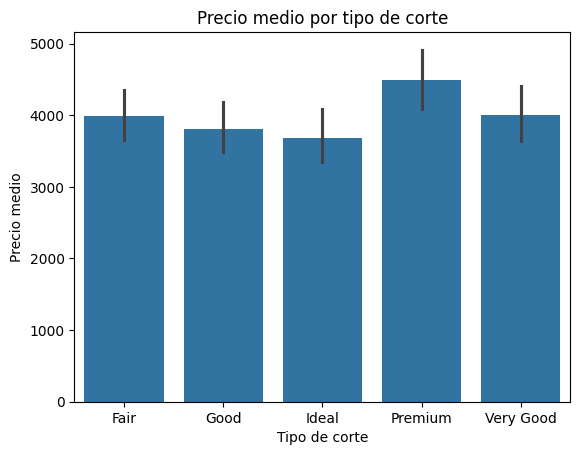

In [15]:
sns.barplot(x='cut', y='price_mean', data=df_grouped)
plt.title('Precio medio por tipo de corte')
plt.xlabel('Tipo de corte')
plt.ylabel('Precio medio')
plt.show()

4.2 Gráfico de barras del precio medio por tipo de claridad

A continuación, se presenta un gráfico de barras que muestra el precio medio de los diamantes según su tipo de claridad (`clarity`). Este gráfico permite observar cómo varía el precio según las diferentes categorías de claridad.


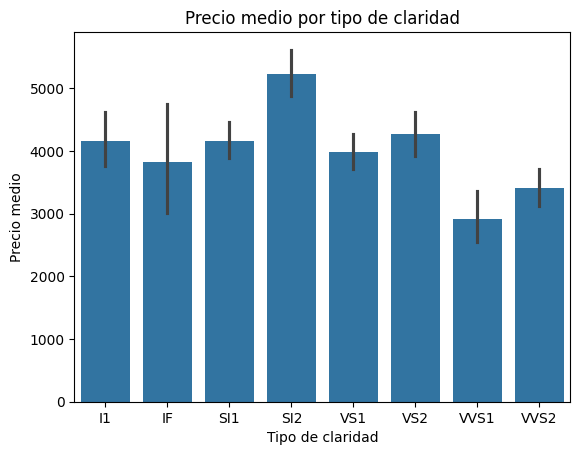

In [16]:
sns.barplot(x='clarity', y='price_mean', data=df_grouped)
plt.title('Precio medio por tipo de claridad')
plt.xlabel('Tipo de claridad')
plt.ylabel('Precio medio')
plt.show()

4.3 Gráfico de barras del precio máximo por color

A continuación, se presenta un gráfico de barras que muestra el precio máximo de los diamantes según su color (`color`). Este gráfico permite observar cómo varía el precio máximo de los diamantes en función de su color.


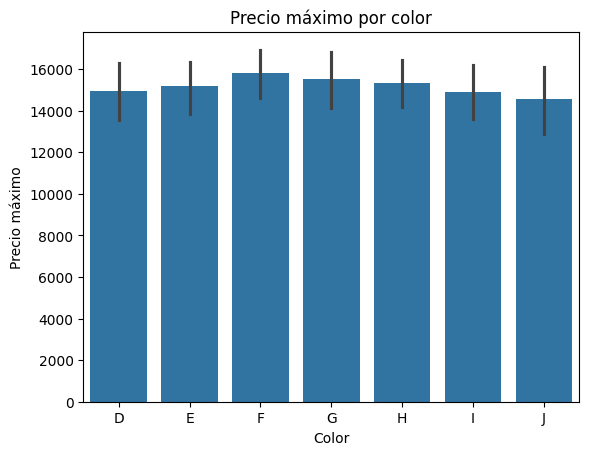

In [17]:
# Gráficoráfico de barras del precio máximo por color
sns.barplot(x='color', y='price_max', data=df_grouped)
plt.title('Precio máximo por color')
plt.xlabel('Color')
plt.ylabel('Precio máximo')
plt.show()

### PARTE 3: 20 % Distribuciones

- **Outliers:** Visualización Q1 y Q3 y calcular límites Tukey y filtrar. Sobre la columna precio.


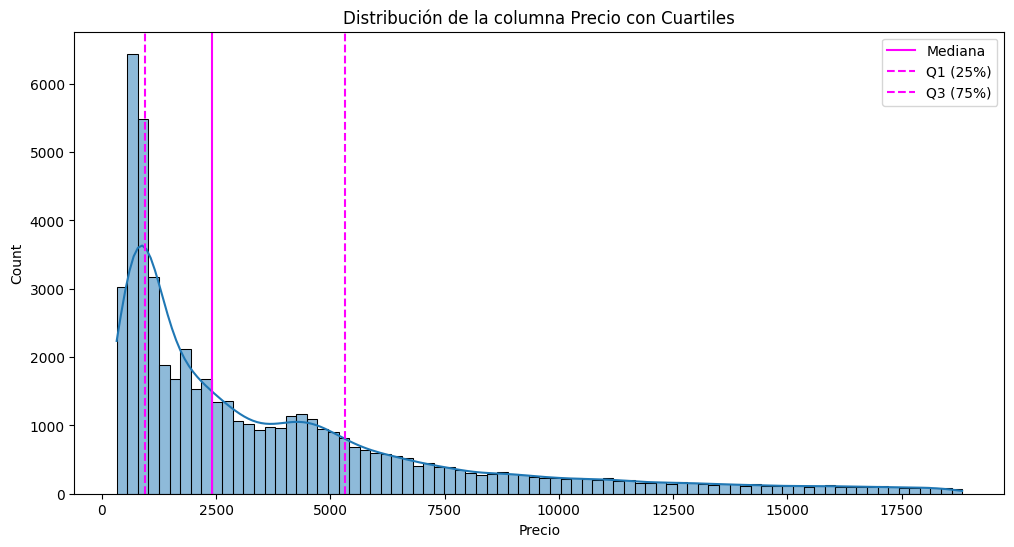

Número de filas antes del filtrado: 53940
Número de filas después del filtrado: 50401


In [18]:
# Visualización de la distribución de la columna precio
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.axvline(df['price'].median(), color='magenta', label='Mediana')
plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--', label='Q1 (25%)')
plt.axvline(df['price'].quantile(0.75), color='magenta', linestyle='--', label='Q3 (75%)')

plt.legend()
plt.title('Distribución de la columna Precio con Cuartiles')
plt.xlabel('Precio')
plt.show()

# Calculamos los cuartiles Q1 y Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculamos los límites de Tukey
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los outliers
df_filtrado = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

# Sacamos el número de filas antes y después del filtrado para ver la diferencia entre el antes y el después del filtrado
print(f"Número de filas antes del filtrado: {df.shape[0]}")
print(f"Número de filas después del filtrado: {df_filtrado.shape[0]}")

- **Asimetría, Curtosis y Transformación de Datos:** Calcular la asimetría, curtosis y transformar los datos con logaritmo o raíz cuadrada.


In [19]:
from scipy.stats import skew, kurtosis

# Calculamos la  asimetría (skewness) y curtosis (kurtosis) para la columna 'price'
asimetria = skew(df['price'])
curtosis_valor = kurtosis(df['price'])

print(f"Asimetría de la columna 'price': {asimetria}")
print(f"Curtosis de la columna 'price': {curtosis_valor}")

# Transformación de los datos con logaritmo y creamos la columna price_log
df['price_log'] = np.log(df['price'] + 1)  # Sumamos 1 para evitar log(0) si hay valores cero

# Transformación de los datos con raíz cuadrada y creamos la columna price_sqrt
df['price_sqrt'] = np.sqrt(df['price'])

print(df[['price', 'price_log', 'price_sqrt']].head())

Asimetría de la columna 'price': 1.6183805066956198
Curtosis de la columna 'price': 2.1776085326518633
   price  price_log  price_sqrt
0  326.0   5.789960   18.055470
1  326.0   5.789960   18.055470
2  327.0   5.793014   18.083141
3  334.0   5.814130   18.275667
4  335.0   5.817111   18.303005


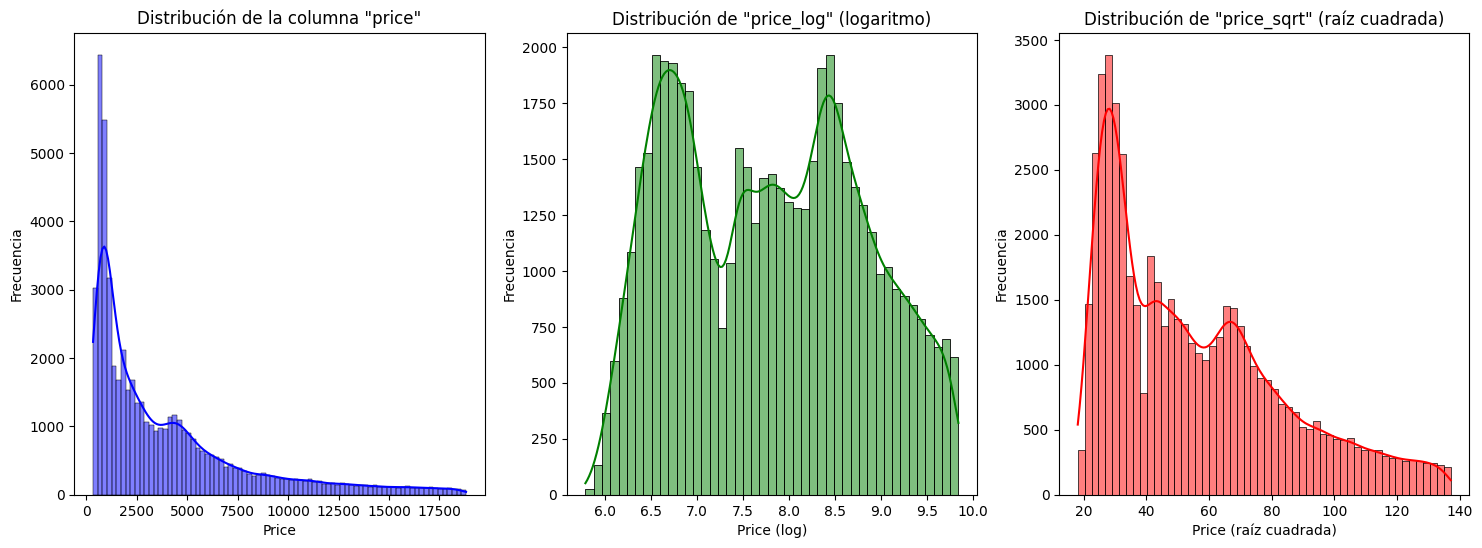

In [20]:
plt.figure(figsize=(18, 6))

# Gráfico 1: Histograma de la columna original 'price'
plt.subplot(1, 3, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribución de la columna "price"')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Gráfico 2: Histograma de la columna transformada con logaritmo 'price_log'
plt.subplot(1, 3, 2)
sns.histplot(df['price_log'], kde=True, color='green')
plt.title('Distribución de "price_log" (logaritmo)')
plt.xlabel('Price (log)')
plt.ylabel('Frecuencia')

# Gráfico 3: Histograma de la columna transformada con raíz cuadrada 'price_sqrt'
plt.subplot(1, 3, 3)
sns.histplot(df['price_sqrt'], kde=True, color='red')
plt.title('Distribución de "price_sqrt" (raíz cuadrada)')
plt.xlabel('Price (raíz cuadrada)')
plt.ylabel('Frecuencia')

plt.show()

> **Nota: Visualización de Transformaciones de Datos**
>
> En esta sección, hemos visualizado cómo las transformaciones aplicadas a la columna `price` afectan a la distribución de los datos. Para ello, creamos tres gráficos:
>
> 1. **Distribución Original de "price":** El primer gráfico muestra la distribución de los precios originales en la columna `price`. Esto nos permite observar cómo se distribuyen los datos de forma natural, a menudo con una distribución sesgada o con valores extremos (outliers).
>
> 2. **Distribución de "price_log" (Logaritmo):** El segundo gráfico muestra cómo se ve la distribución después de aplicar la transformación logarítmica. Esta transformación tiende a reducir los valores extremos y puede hacer que la distribución sea más simétrica, especialmente cuando hay valores muy grandes.
>
> 3. **Distribución de "price_sqrt" (Raíz Cuadrada):** El tercer gráfico ilustra la transformación con la raíz cuadrada. Al igual que el logaritmo, esta transformación también reduce el impacto de los valores extremos, aunque con un efecto diferente, ya que tiende a suavizar los datos de manera menos pronunciada.
>
> **Interpretación de los Cálculos de Asimetría y Curtosis:**
> - **Asimetría de la columna 'price':** 1.618 (aproximadamente). Un valor de asimetría positivo indica que la distribución de los precios está sesgada hacia la derecha, es decir, hay una cola más larga en los valores más altos. Esto sugiere que hay una presencia de precios muy altos que tiran de la distribución hacia la derecha.
> 
> - **Curtosis de la columna 'price':** 2.18 (aproximadamente). La curtosis es una medida de la "altitud" y "anchura" de las colas de una distribución. Un valor de curtosis superior a 3 indica una distribución leptocúrtica (más concentrada en el centro y con colas más largas que la normal), pero en este caso, con un valor de 2.18, podemos concluir que los precios tienen una distribución más cercana a la normal, con colas moderadas.
>
> **Conclusión:**
> - Los valores de asimetría y curtosis sugieren que los precios tienen una distribución sesgada y con una leve concentración en los valores centrales.
> - Al aplicar las transformaciones logarítmica y de raíz cuadrada, se busca reducir la asimetría y hacer que los datos sean más simétricos.
> - **La transformación logarítmica** suele ser la más efectiva para manejar distribuciones sesgadas hacia la derecha, mientras que **la raíz cuadrada** ofrece un enfoque más suave.

- **Visualización de la transformación de datos a través de boxplot**

/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_2337/134294454.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_2337/134294454.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_2337/134294454.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




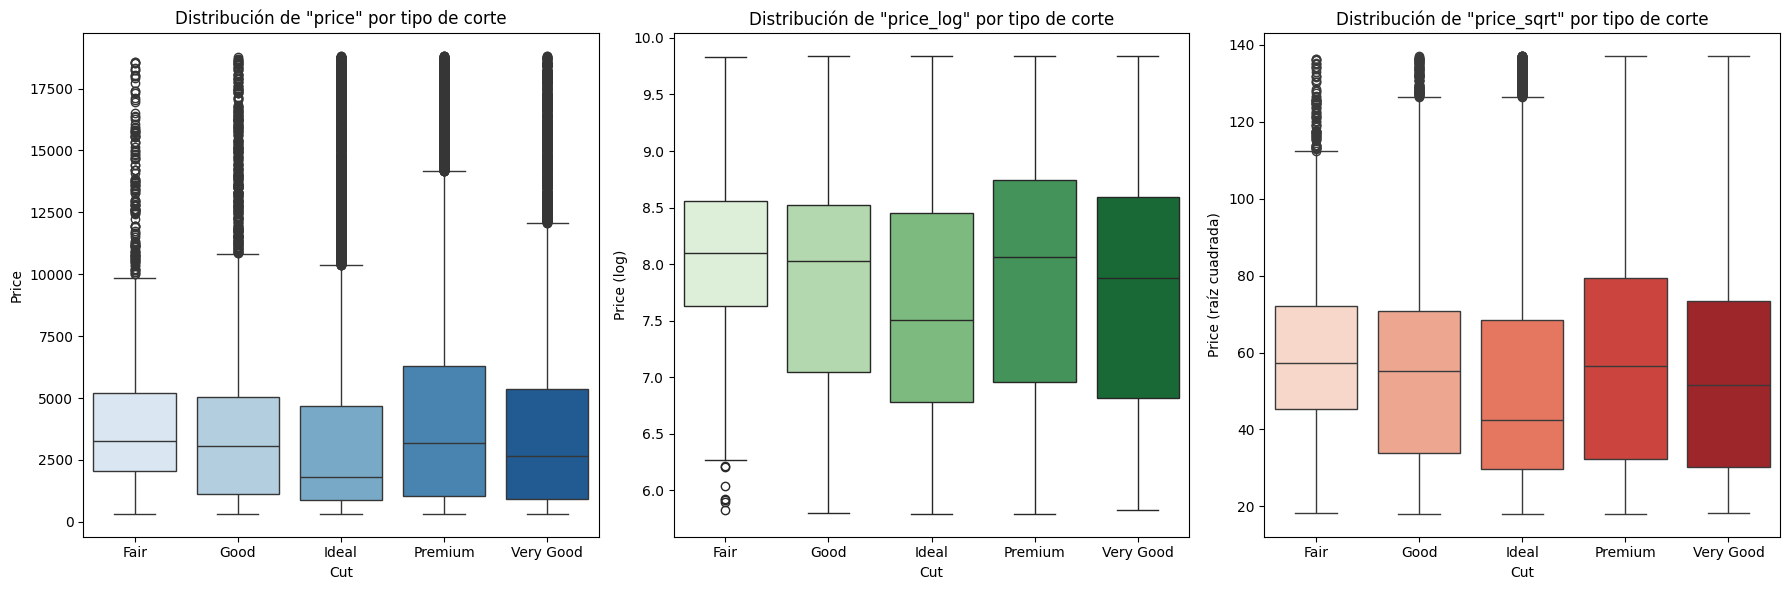

In [33]:
plt.figure(figsize=(18, 6))

# Boxplot para la columna original 'price' por tipo de corte
plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=df, palette='Blues')
plt.title('Distribución de "price" por tipo de corte')
plt.xlabel('Cut')
plt.ylabel('Price')

# Boxplot para la columna log-transformada 'price_log' por tipo de corte
plt.subplot(1, 3, 2)
sns.boxplot(x='cut', y='price_log', data=df, palette='Greens')
plt.title('Distribución de "price_log" por tipo de corte')
plt.xlabel('Cut')
plt.ylabel('Price (log)')

# Boxplot para la columna raíz cuadrada 'price_sqrt' por tipo de corte
plt.subplot(1, 3, 3)
sns.boxplot(x='cut', y='price_sqrt', data=df, palette='Reds')
plt.title('Distribución de "price_sqrt" por tipo de corte')
plt.xlabel('Cut')
plt.ylabel('Price (raíz cuadrada)')

plt.tight_layout()
plt.show()


- **Discretización de la columna precio:** Discretizar la columna precio por barato, medio, caro usando la función `pd.cut`.

In [21]:
# Discretización de la columna precio utilizando pd.cut
bins = [0, 1000, 5000, float('inf')] 
labels = ['barato', 'medio', 'caro']  

# Creamos una nueva columna 'price_category' con la discretización
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Se filtran las primeras filas de cada categoría
df_barato = df[df['price_category'] == 'barato'].head()
df_medio = df[df['price_category'] == 'medio'].head()
df_caro = df[df['price_category'] == 'caro'].head()

# Mostrar los resultados de forma ordenada
print("**Barato:**")
display(df_barato)

print("\n**Medio:**")
display(df_medio)

print("\n**Caro:**")
display(df_caro)

**Barato:**


carat      cut color clarity      depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2  61.500000   55.0  326.0  3.95  3.98  2.43   
1   0.21  Premium     E     SI1  59.799999   61.0  326.0  3.89  3.84  2.31   
2   0.23     Good     E     VS1  56.900002   65.0  327.0  4.05  4.07  2.31   
3   0.29  Premium     I     VS2  62.400002   58.0  334.0  4.20  4.23  2.63   
4   0.31     Good     J     SI2  63.299999   58.0  335.0  4.34  4.35  2.75   

  cut_int  price_iva  price_discount    volumen  price_log  price_sqrt  \
0       5     394.46           293.4  38.202034   5.789960   18.055470   
1       4     394.46           326.0  34.505856   5.789960   18.055470   
2       2     395.67           327.0  38.076889   5.793014   18.083141   
3       4     404.14           334.0  46.724579   5.814130   18.275667   
4       2     405.35           335.0  51.917248   5.817111   18.303005   

  price_category  
0         barato  
1         barato  
2         barato  
3         barato  
4         barato


**Medio:**


carat        cut color clarity      depth  table   price     x     y  \
90   0.70      Ideal     E     SI1  62.500000   57.0  2757.0  5.70  5.72   
91   0.86       Fair     E     SI2  55.099998   69.0  2757.0  6.45  6.33   
92   0.70      Ideal     G     VS2  61.599998   56.0  2757.0  5.70  5.67   
93   0.71  Very Good     E     VS2  62.400002   57.0  2759.0  5.68  5.73   
94   0.78  Very Good     G     SI2  63.799999   56.0  2759.0  5.81  5.85   

       z cut_int  price_iva  price_discount     volumen  price_log  \
90  3.57       5    3335.97          2757.0  116.396263   7.922261   
91  3.52       1    3335.97          2757.0  143.716309   7.922261   
92  3.50       5    3335.97          2757.0  113.116501   7.922261   
93  3.56       3    3338.39          2759.0  115.865173   7.922986   
94  3.72       3    3338.39          2759.0  126.437218   7.922986   

    price_sqrt price_category  
90   52.507141          medio  
91   52.507141          medio  
92   52.507141          medio  
93   52.526184          medio  
94   52.526184          medio


**Caro:**


carat        cut color clarity      depth  table   price     x     y  \
11416   1.16      Ideal     E     SI2  62.700001   56.0  5001.0  6.69  6.73   
11417   1.16      Ideal     E     SI2  59.900002   57.0  5001.0  6.80  6.82   
11418   0.90       Good     G    VVS2  63.599998   58.0  5001.0  6.10  6.11   
11419   0.90  Very Good     E     VS1  62.299999   56.0  5001.0  6.10  6.19   
11420   0.90    Premium     D     VS2  62.599998   59.0  5001.0  6.14  6.17   

          z cut_int  price_iva  price_discount     volumen  price_log  \
11416  4.21       5    6051.21          5001.0  189.549774   8.517593   
11417  4.08       5    6051.21          5001.0  189.214096   8.517593   
11418  3.88       2    6051.21          5001.0  144.611481   8.517593   
11419  3.83       3    6051.21          5001.0  144.616959   8.517593   
11420  3.85       4    6051.21          5001.0  145.852631   8.517593   

       price_sqrt price_category  
11416   70.717751           caro  
11417   70.717751           caro  
11418   70.717751           caro  
11419   70.717751           caro  
11420   70.717751           caro

In [22]:
import plotly.express as px

# Crear un gráfico sunburst por tipo de corte, color y precio
fig = px.sunburst(
    data_frame=df.sort_values("carat"),  # Ordenamos por 'carat' o cualquier criterio
    values="carat",                      # Tamaño representado por el peso del diamante
    path=["cut", "color", "clarity"],    # Jerarquía: tipo de corte -> color -> claridad
    hover_name="cut",                    # Información al pasar el cursor
    color="price",                        # Color en función del precio
    title="Distribución de Diamantes por Corte, Color y Claridad"  # Título
)

# Aumentar el tamaño de la figura para hacerlo más legible
fig.update_layout(
    width=1000,  # Ancho mayor
    height=1000,  # Altura mayor
    margin=dict(t=50, b=50, l=50, r=50),  # Ajustamos los márgenes
    sunburstcolorway=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15C"],  # Colores personalizados
)

# Mostrar el gráfico
fig.show()

/opt/anaconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
/opt/anaconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
/opt/anaconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

> **Nota sobre el Gráfico Sunburst: Distribución de Diamantes por Corte, Color y Claridad**
>
> El gráfico **Sunburst** nos permite visualizar cómo se distribuyen los diamantes según tres características principales: **tipo de corte**, **color** y **claridad**. Aquí te explico cómo se organiza:
>
> 1. **Corte (Cut)**: Este es el primer nivel de la jerarquía. Los diamantes se agrupan según el tipo de corte, lo que es fundamental porque define las proporciones y simetría de cada piedra.
> 
> 2. **Color (Color)**: En el segundo nivel, los diamantes se organizan según su color. Este factor influye directamente en la calidad y el valor que se percibe del diamante.
> 
> 3. **Claridad (Clarity)**: El tercer nivel muestra la claridad, es decir, la cantidad de inclusiones o imperfecciones dentro del diamante.
>
>
> ### ¿Qué muestra cada segmento?
>
> - **Tamaño del segmento**: El tamaño de cada segmento es proporcional al valor de **carat**, o sea, al peso del diamante. Los diamantes más pesados ocuparán segmentos más grandes.
> 
> - **Color**: Cada segmento está coloreado según el valor de **precio**. Los diferentes colores permiten ver rápidamente cómo varía el precio de los diamantes en función de las categorías de corte, color y claridad.
>
>
> ### Personalización del gráfico
>
> - **Tamaño y márgenes**: El gráfico tiene un tamaño de 1000x1000 píxeles y los márgenes han sido ajustados para mejorar la legibilidad, asegurando que todos los segmentos sean fácilmente visibles.
> 
> - **Colores personalizados**: Se eligió una paleta de colores específica para hacer el gráfico más atractivo visualmente, y asociar diferentes colores a las categorías de precio de los diamantes.
>
>
> Este gráfico es ideal para entender cómo se distribuyen los diamantes según sus características, y cómo cada una de ellas (corte, color, claridad) se relaciona con el precio. Con solo mirar el gráfico, se puede obtener una interpretación clara de la variabilidad de los diamantes en el conjunto de datos.

### PARTE 4: 30% Visualizaciones

#### **Seaborn EDAS:**

##### **Univariantes:**
- Crear histogramas y curvas de densidad para las variables numéricas.


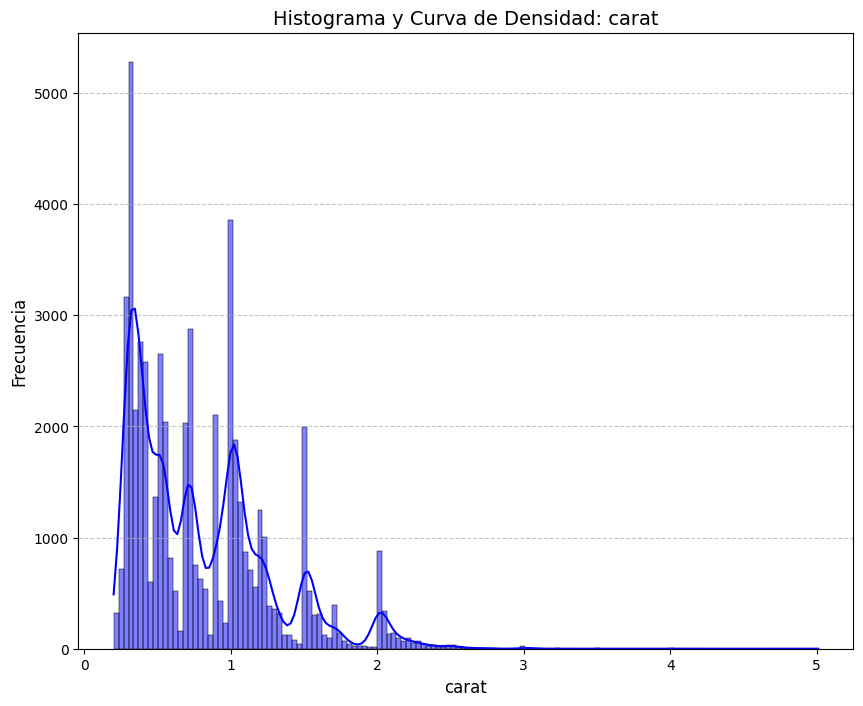

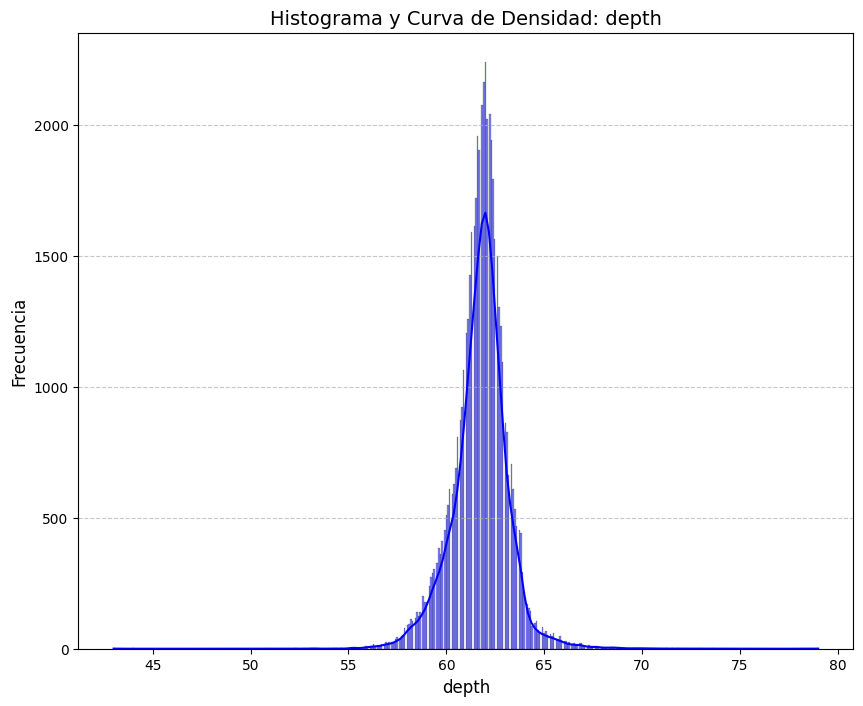

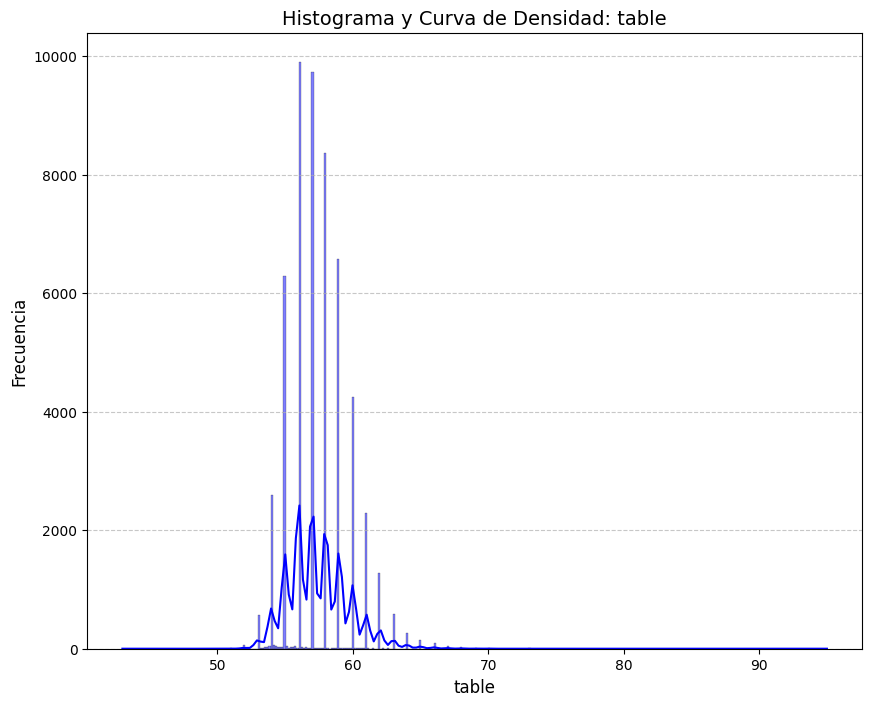

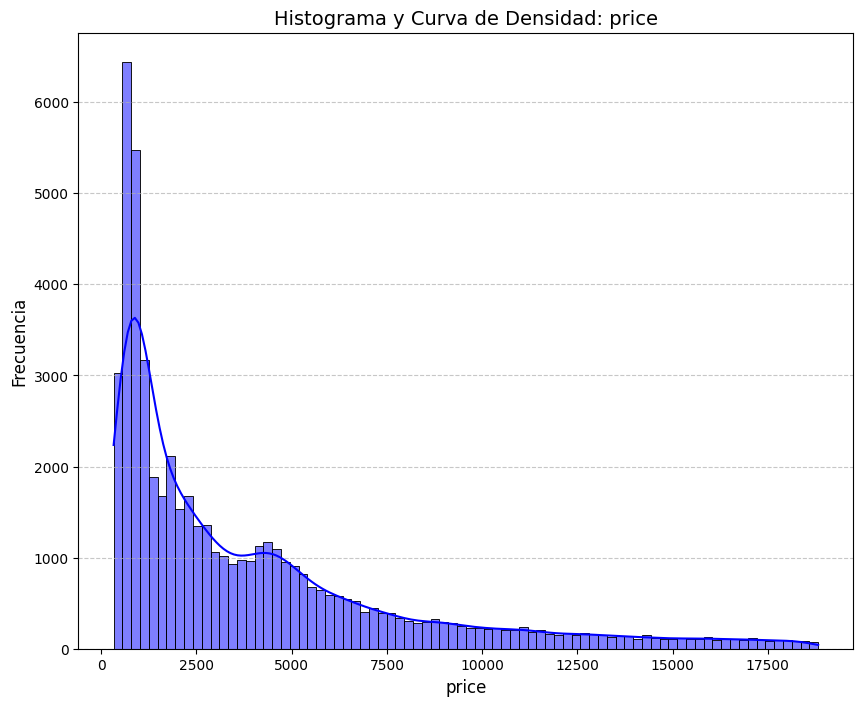

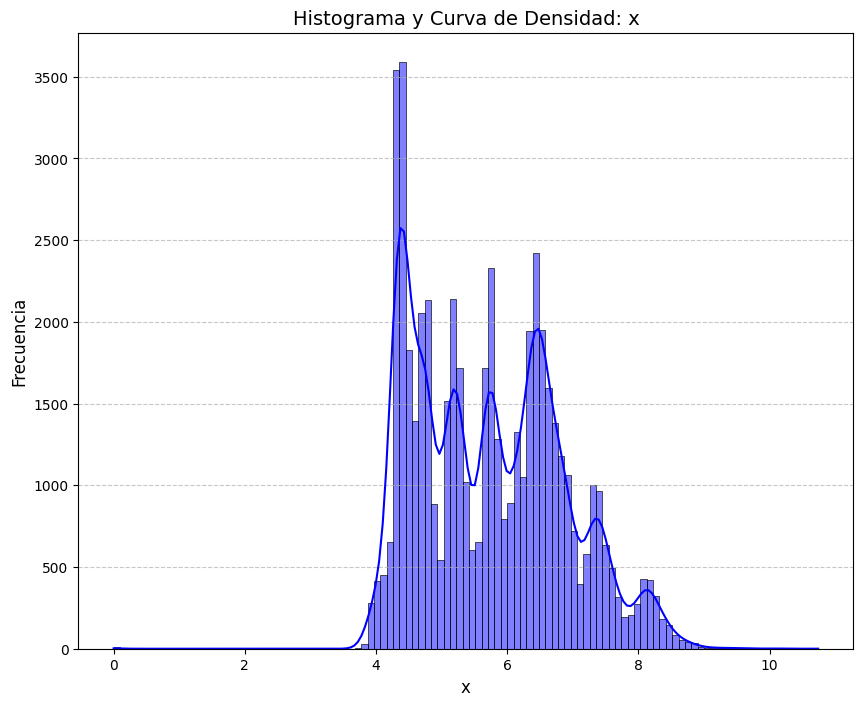

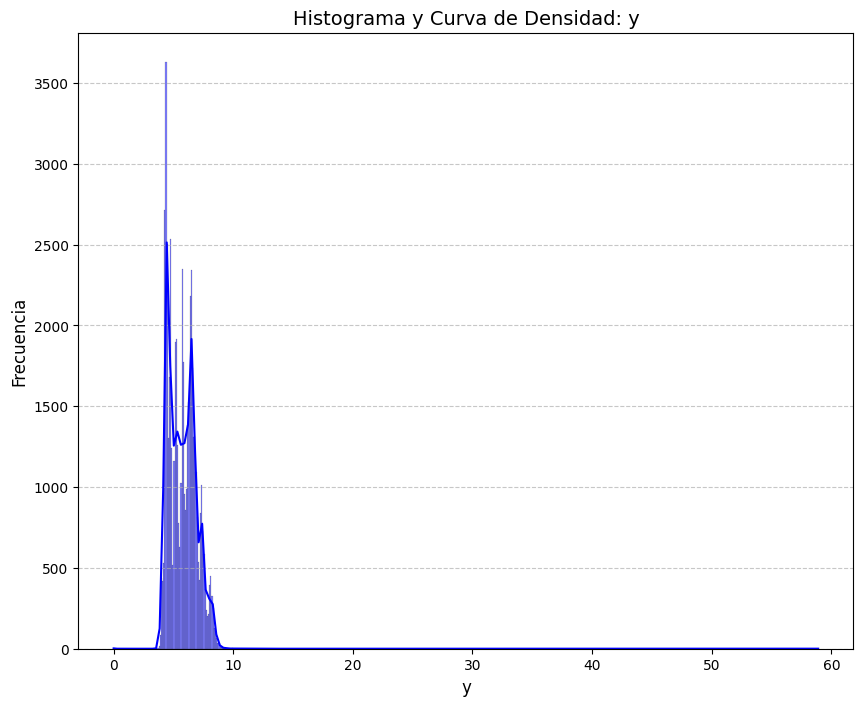

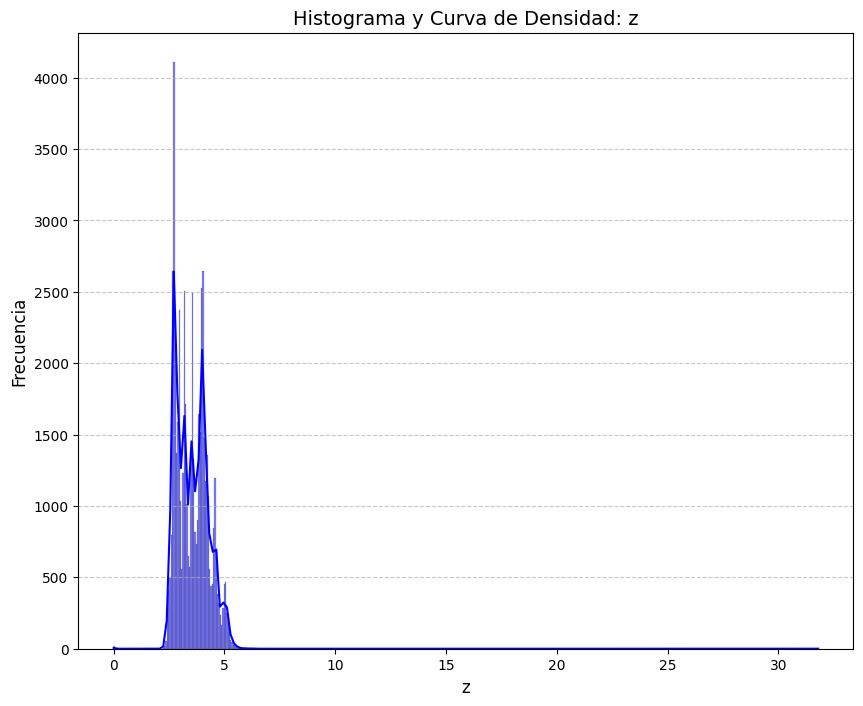

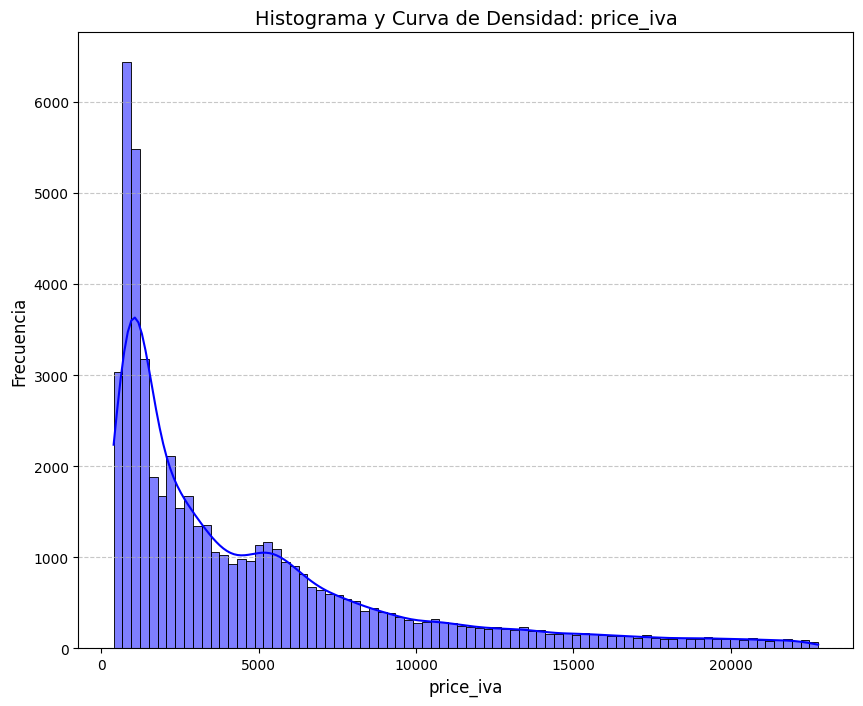

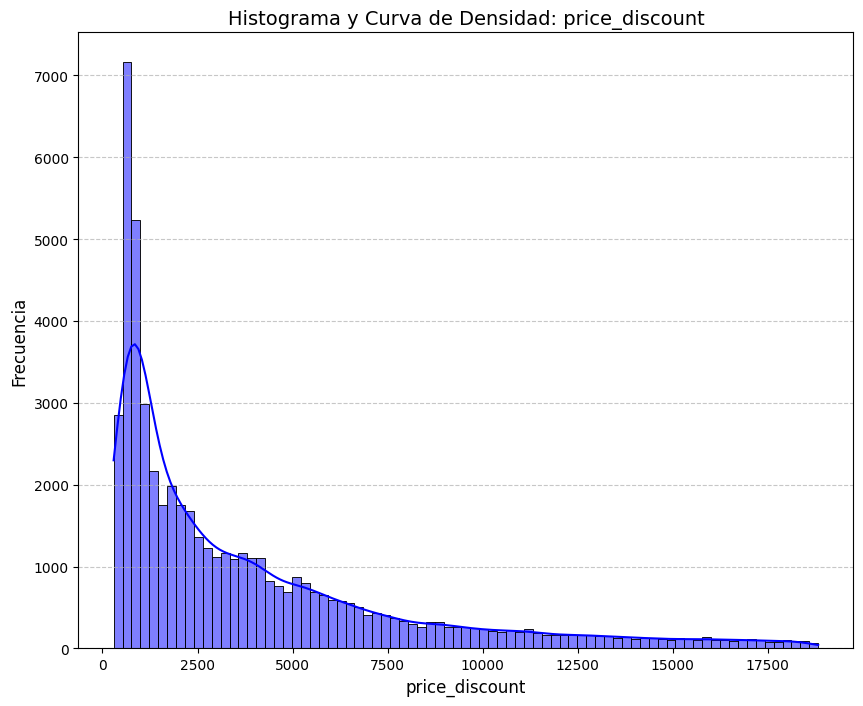

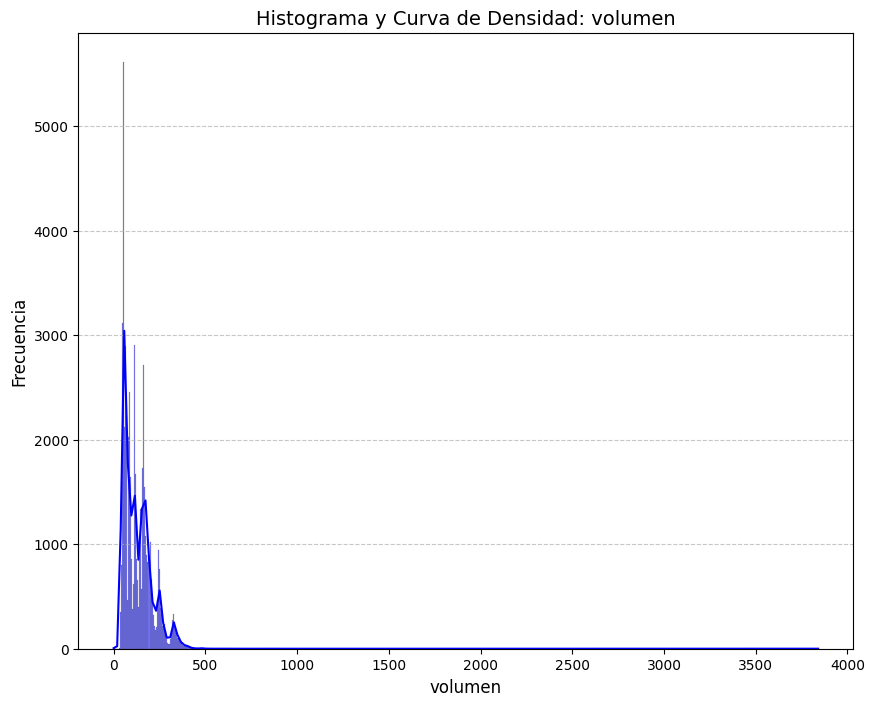

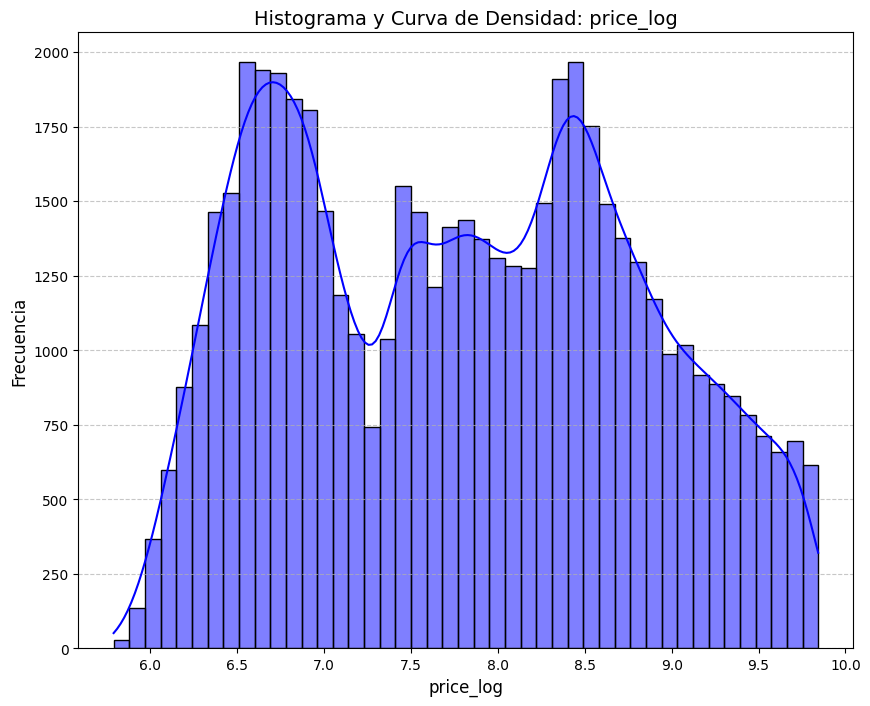

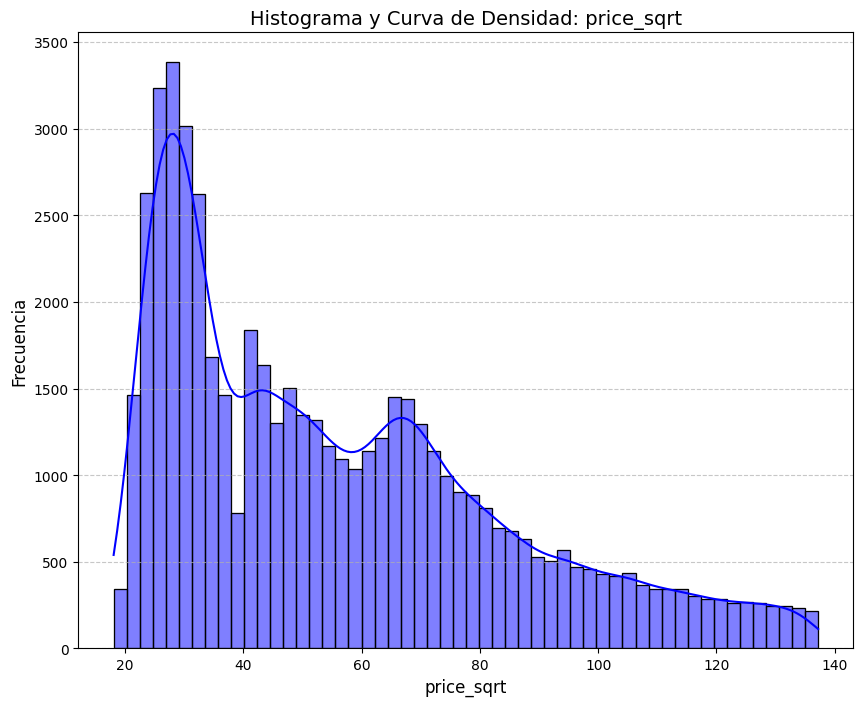

In [23]:
# Filtramos en primer lugar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float32', 'float64']).columns 

"""
Con esto lo que estamos haciendo es coger todas las columnas del DataFrame que son de tipo numérico
y las guardo en una variable para luego iterar las columnas y poder sacar a través de un bucle for cada uno de los histogrmamas.

""""""
Referencia para usar el 'select_dtypes' en el siguiente enlace ==> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
"""

# Creamos los gráficos para cada columna
for col in columnas_numericas:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Histograma y Curva de Densidad: {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- Visualizar boxplots para identificar distribuciones y posibles outliers.

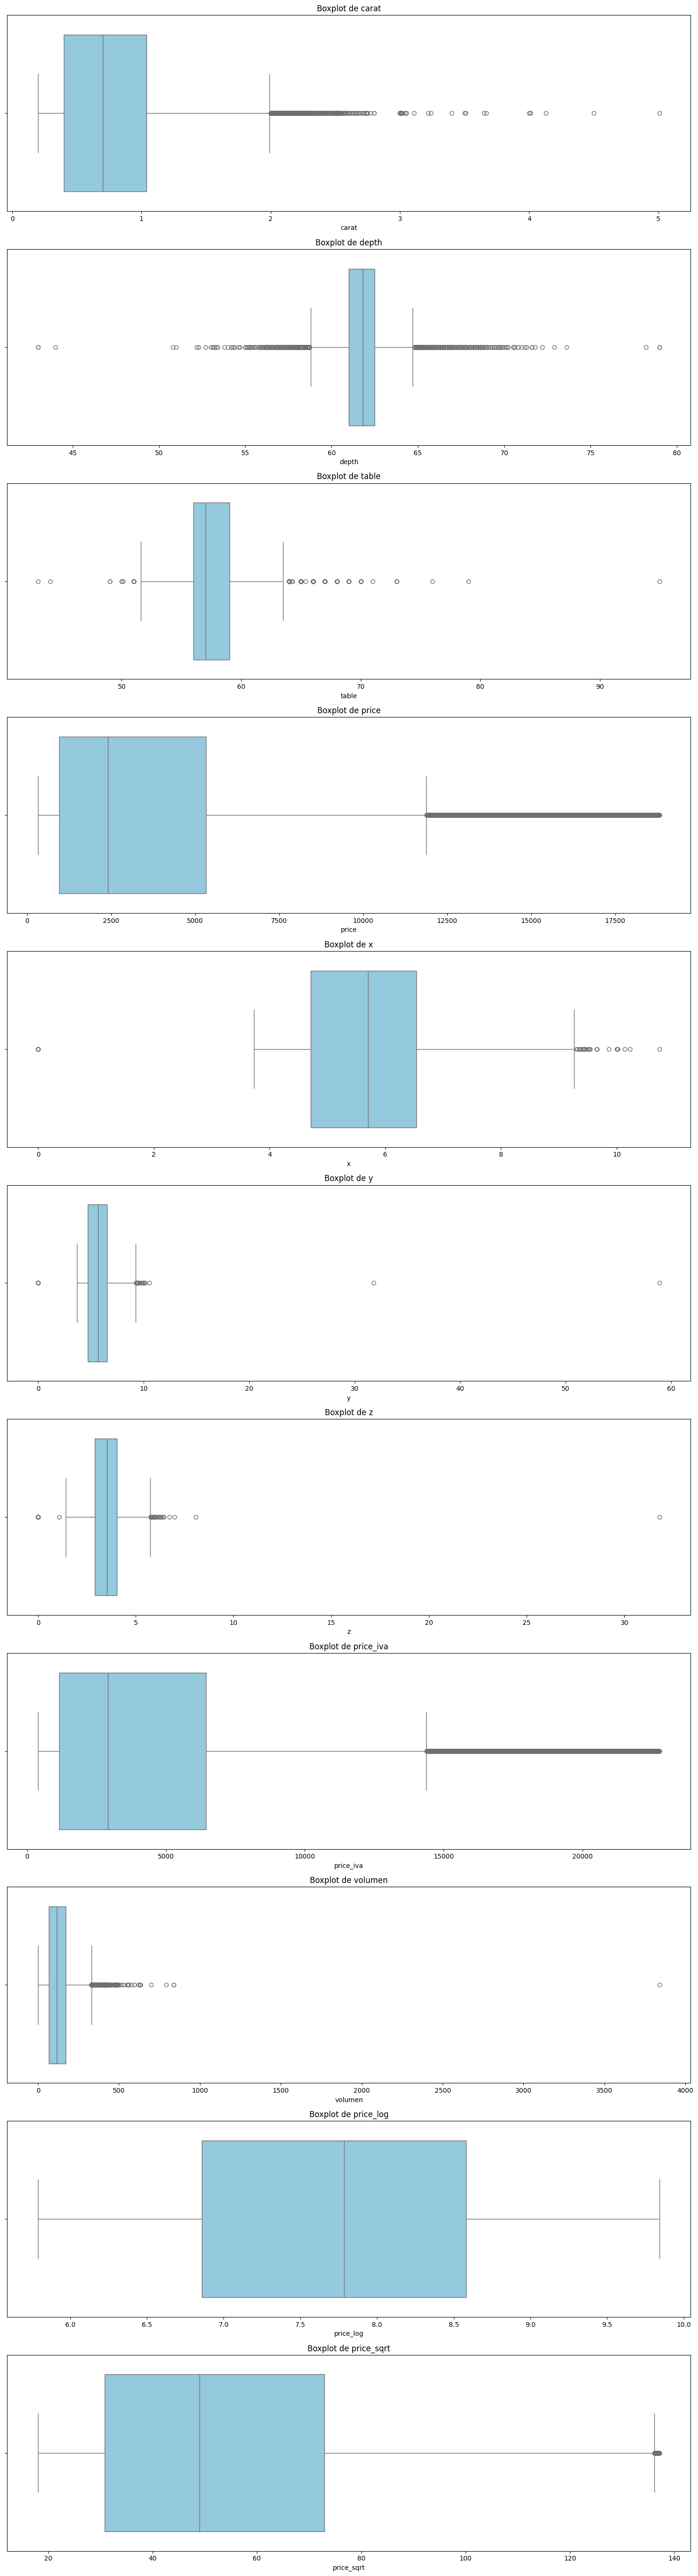

In [24]:
# Seleccionamos las columnas numéricas
columnas_numericas = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'price_iva', 'volumen', 'price_log', 'price_sqrt']

# Configuramos el tamaño del gráfico general
plt.figure(figsize=(15, 5 * len(columnas_numericas)))

# Iteramos sobre las columnas numéricas y generamos un subtplot para cada una
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas), 1, i) 
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)


plt.tight_layout()  # He puesto el 'tight_layout' para ajustar los espacios entre los subgráficos ya que se aproximaban las letras bastante
plt.show()

- Usar countplot para mostrar la frecuencia de valores en variables categóricas.

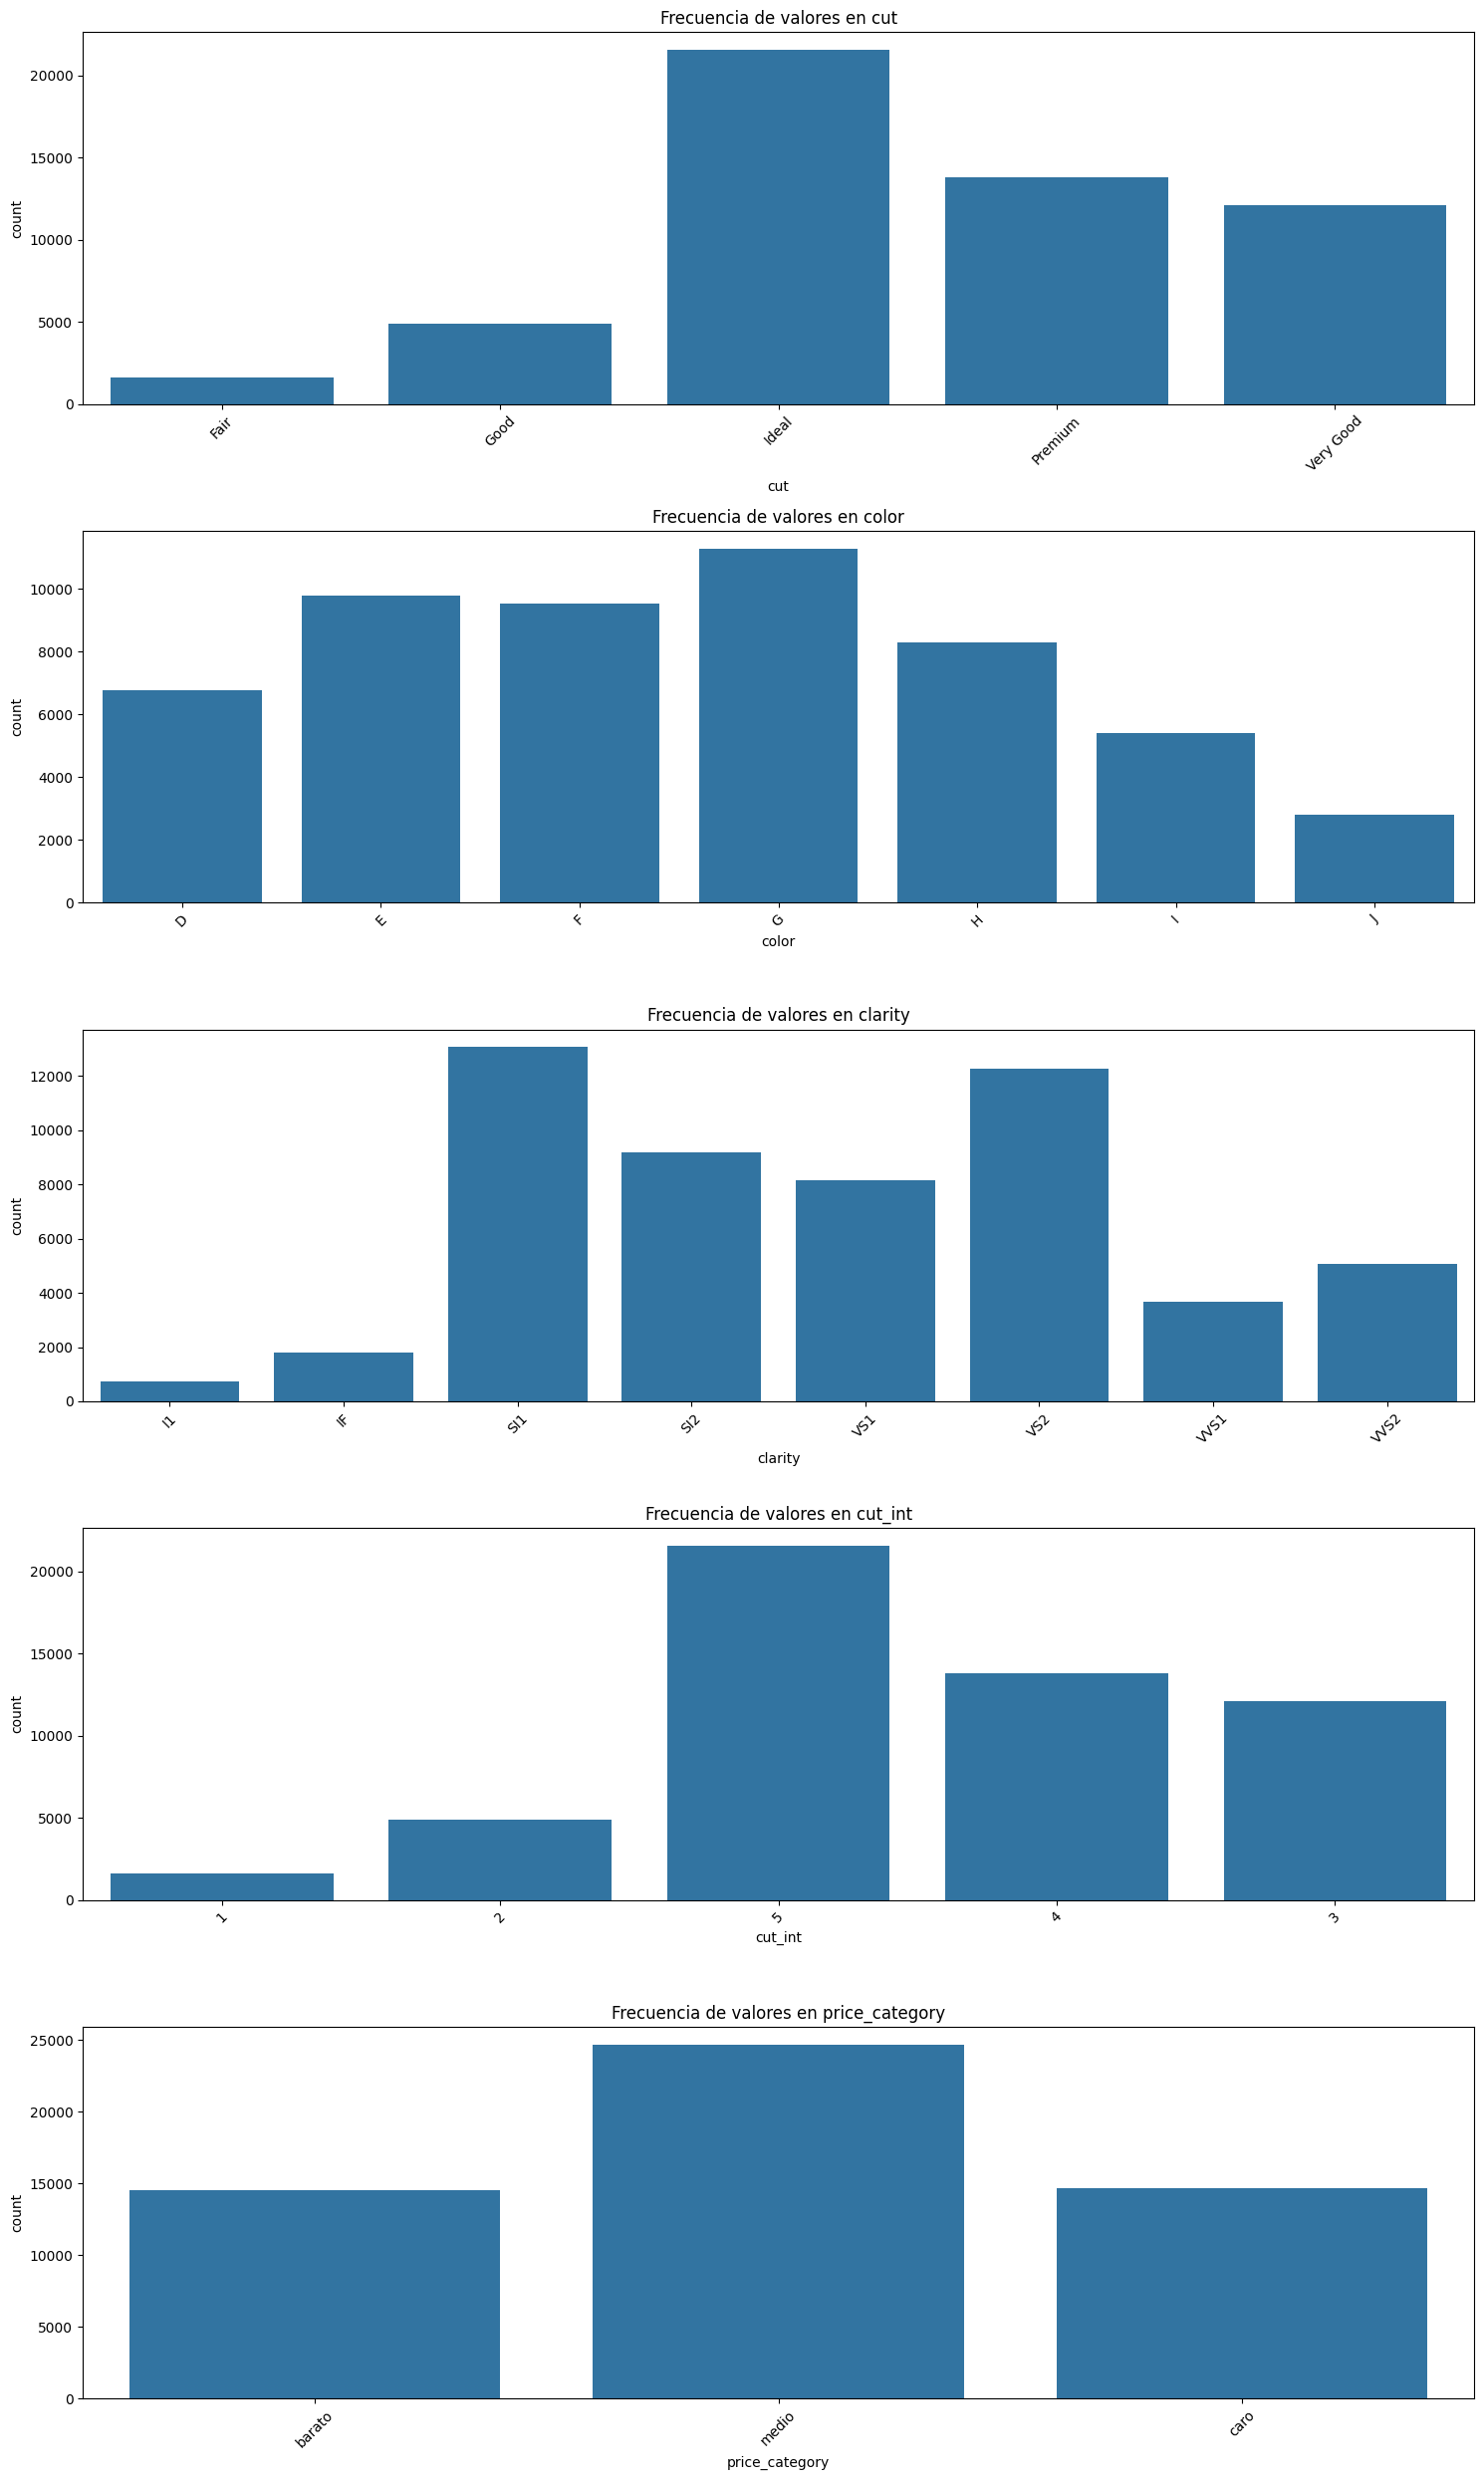

In [25]:
# Definimos las columnas categóricas
categorical_columns = ['cut', 'color', 'clarity', 'cut_int', 'price_category']

# Creamos una figura para todos los gráficos
plt.figure(figsize=(15, 5 * len(categorical_columns)))

# Iteramos sobre las columnas categóricas y generar un countplot para cada una
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i) 
    sns.countplot(x=column, data=df)
    plt.title(f'Frecuencia de valores en {column}')
    plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

##### **Bivariantes y Multivariantes:**
- Usar scatterplots con diferentes configuraciones:
  - `hue` para agregar una dimensión categórica.
  - `size` para representar una dimensión numérica adicional.
  - `style` para diferenciar por una categoría.



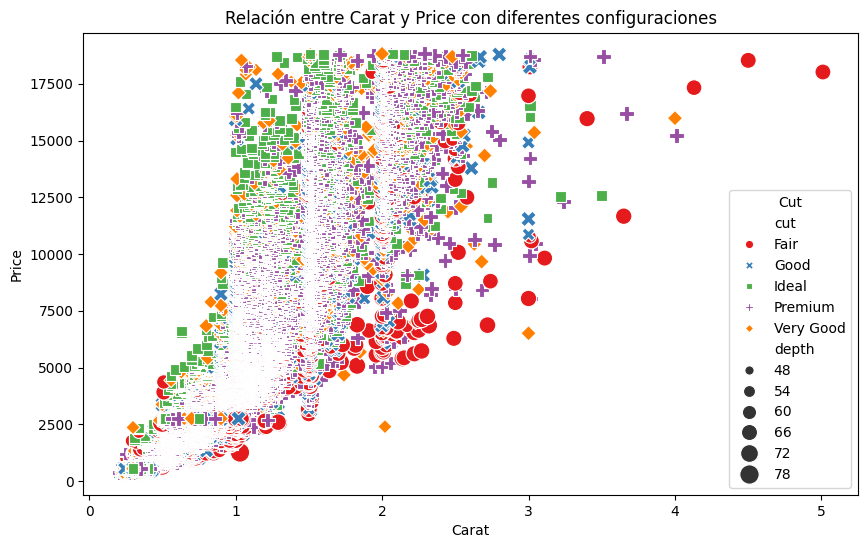

In [26]:
# Creamos un scatterplot entre 'carat' y 'price' con diferentes configuraciones
plt.figure(figsize=(10, 6))

# Usando 'hue' para que nos lo pinte por 'cut' (corte del diamante)
sns.scatterplot(x='carat', y='price', data=df, hue='cut', palette='Set1', style='cut', size='depth', sizes=(20, 200))

plt.title('Relación entre Carat y Price con diferentes configuraciones')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()

> **Nota sobre el Gráfico de Dispersión (Scatterplot): Relación entre Carat y Price con Diferentes Configuraciones**
>
> El gráfico de dispersión (scatterplot) nos permite visualizar cómo se distribuyen los diamantes en función de dos características numéricas: **carat** (peso) y **price** (precio). A continuación, te explico cómo se organiza y se personaliza:
>
> 1. **Eje X (Carat)**: En el eje horizontal, se representa el peso de los diamantes (en quilates). Este es uno de los factores más importantes al determinar el precio de un diamante.
> 
> 2. **Eje Y (Price)**: En el eje vertical, se encuentra el precio de los diamantes, que varía según diversas características como el corte, el color, y el peso del diamante.
>
>
> ### ¿Qué muestra cada configuración?
>
> - **`hue='cut'`**: Esta configuración agrega una dimensión categórica, diferenciando los puntos por el tipo de **corte** del diamante. Los puntos se colorean según esta variable, lo que nos permite ver si existe alguna relación entre el corte y las otras dos variables (peso y precio).
> 
> - **`style='cut'`**: Diferencia los puntos por la **forma** según el tipo de corte. Esto facilita la visualización de los diferentes tipos de corte de los diamantes, mejorando la interpretación visual.
> 
> - **`size='depth'`**: Ajusta el **tamaño de los puntos** según el valor de la variable **depth** (profundidad del diamante). Los diamantes con mayor profundidad tendrán puntos más grandes, lo que ayuda a identificar si existe alguna tendencia en función de la profundidad.
> 
> - **`sizes=(20, 200)`**: Esta configuración define el rango de tamaños de los puntos, de modo que los diamantes con mayor profundidad sean representados por puntos proporcionalmente más grandes.

- Calcular la correlación de las variables numéricas con Pandas y visualizarla con un heatmap de Seaborn.

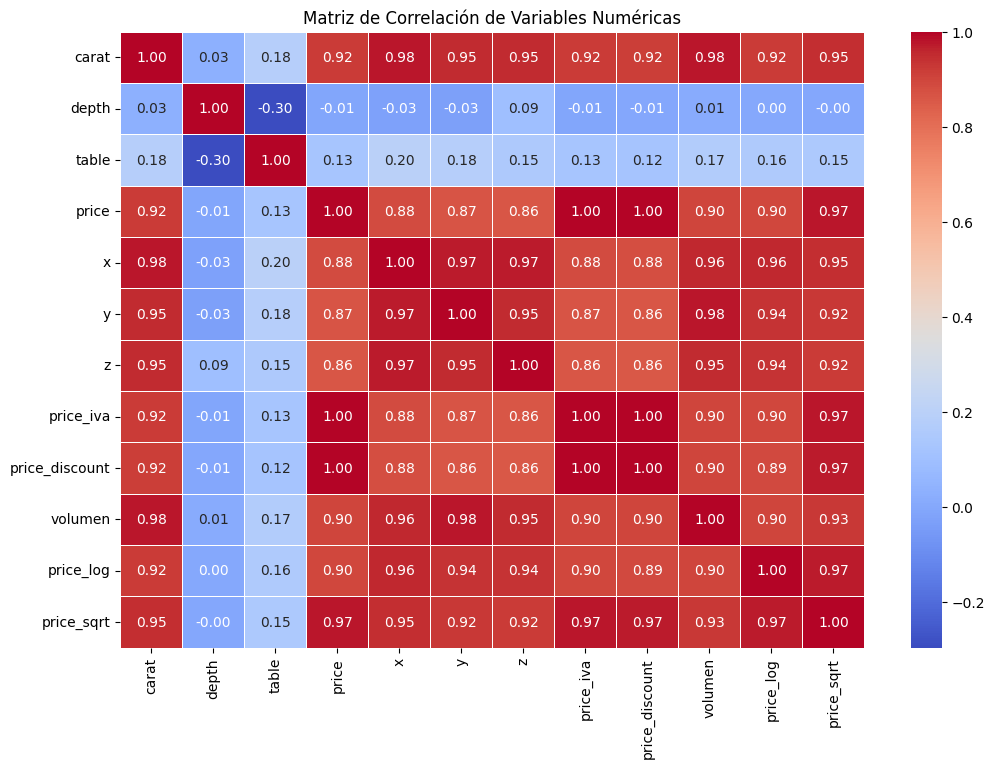

In [27]:
# Filtramos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float32', 'float64'])

# Calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizamos la correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

- Crear un gráfico de barras que muestre las correlaciones de las variables con la columna `'price'`.


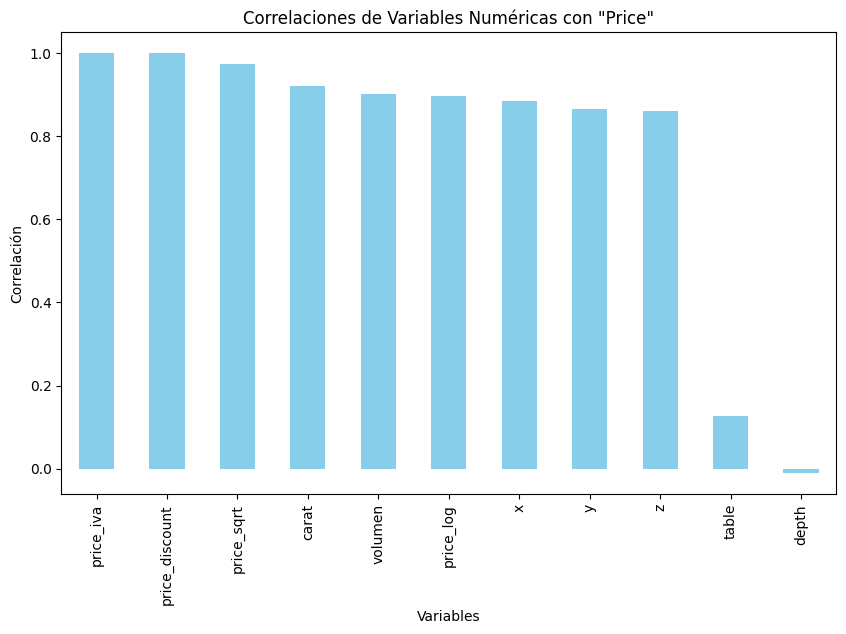

In [28]:
# Filtramos solo las columnas numéricas ya que si metemeos alguna columna que no sea numérica da error al calcular la correlación
df_numeric = df.select_dtypes(include=['float32', 'float64'])

# Se Calcula la correlación con 'price'
correlation_price = df_numeric.corr()['price'].drop('price') 

# Creamos un gráfico de barras para las correlaciones con 'price'
plt.figure(figsize=(10, 6))
correlation_price.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlaciones de Variables Numéricas con "Price"')
plt.ylabel('Correlación')
plt.xlabel('Variables')
plt.show()

- Crear una pivot table utilizando como `index` y `columns` variables categóricas, y como `values`, la columna `'price'`. Visualizarla usando un heatmap de Seaborn.

/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_2337/3445884593.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



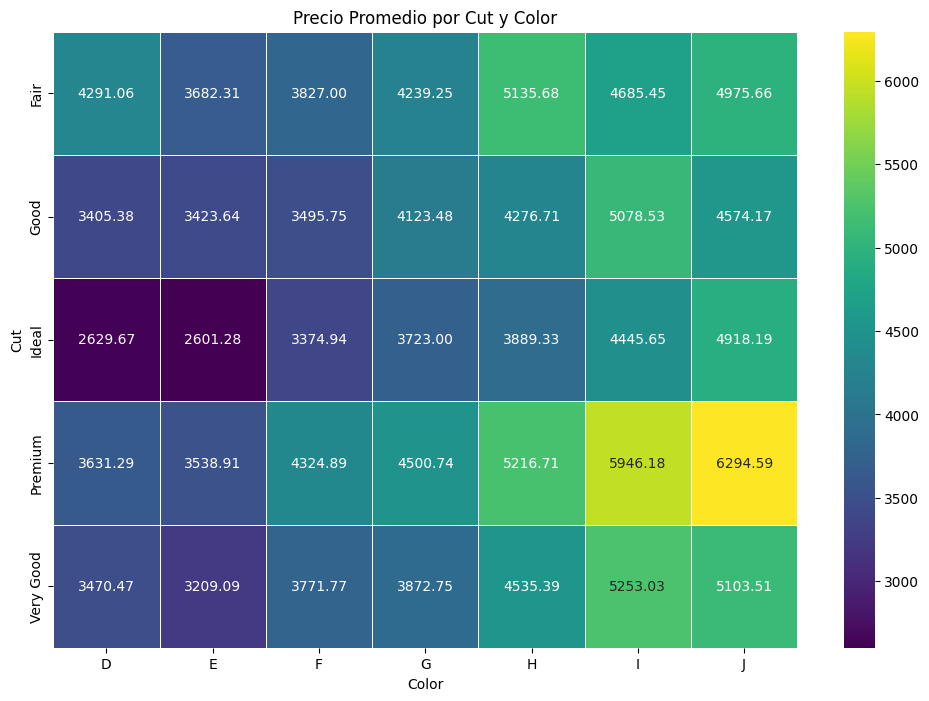

In [29]:
# Creamos una pivot table con 'cut' y 'color' como índices y columnas
pivot_table = pd.pivot_table(df, values='price', index='cut', columns='color', aggfunc='mean')

# Se visualiza la pivot table usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Precio Promedio por Cut y Color')
plt.xlabel('Color')
plt.ylabel('Cut')
plt.show()

##### **Combinaciones:**
- Explorar relaciones usando `relplot` con:
  - Configuraciones como `hue`, `style`, `size`, `row`, `col`.
  - Aplicar filtros específicos como en ejemplos previos, adaptándolos a las necesidades del análisis.

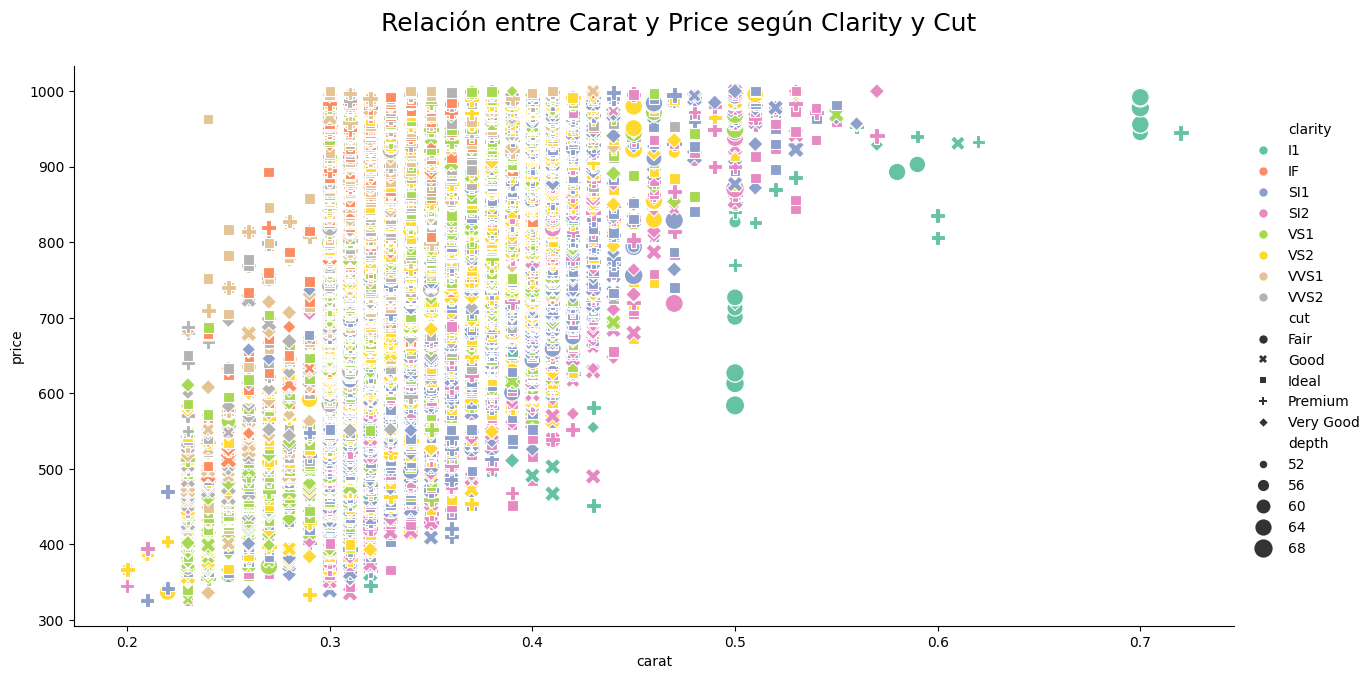

In [30]:
# Filtro: Solo seleccionamos diamantes con un precio de categoría barata para centrarnos en los más baratos
df_filtered = df[df['price_category'] == 'barato']

# Creamos el relplot
sns.relplot(
    x='carat', y='price', 
    data=df_filtered, 
    hue='clarity',
    style='cut', 
    size='depth', 
    sizes=(20, 200), 
    aspect=1.8,
    height=7,  
    palette='Set2', 
)

plt.subplots_adjust(top=0.9, bottom=0.1)

# Título general
plt.suptitle('Relación entre Carat y Price según Clarity y Cut', fontsize=18)

plt.show()

>**Nota sobre el Relplot: Relación entre Carat y Price según Clarity y Cut para los Diamantes Más Baratos**
>
>El gráfico de dispersión (`relplot`) nos permite visualizar cómo se distribuyen los diamantes en función de dos características numéricas clave: **carat** (peso del diamante) y **price** (precio). En este caso, hemos centrado el análisis en los diamantes de >**precio bajo** para explorar cómo sus características influencian su valor. A continuación te explico cómo se organiza y se personaliza >el gráfico:
>
>1. **Eje X (Carat)**: En el eje horizontal, se representa el peso de los diamantes (en quilates). Este es uno de los factores principales que determinan el precio de un diamante, ya que los diamantes más grandes suelen ser más caros.
>
>2. **Eje Y (Price)**: En el eje vertical, se muestra el precio de los diamantes. Aunque los diamantes más grandes generalmente tienen un precio más alto, otros factores como la claridad, el corte y la profundidad también pueden influir en su precio.
>
>### ¿Qué muestra cada configuración?
>
>- **`hue='clarity'`**: Esta configuración agrega una dimensión categórica al gráfico, diferenciando los puntos por la **claridad** del diamante. Los puntos se colorean según esta variable, lo que permite ver cómo la claridad afecta a la relación entre el peso y el precio de los diamantes baratos.
>
>- **`style='cut'`**: Diferencia los puntos por la **forma** según el tipo de corte del diamante. Esto ayuda a visualizar cómo los diferentes cortes afectan la distribución de los diamantes en términos de peso y precio.
>
>- **`size='depth'`**: Ajusta el **tamaño de los puntos** según el valor de la variable **depth** (profundidad del diamante). Los diamantes con mayor profundidad se muestran con puntos más grandes, lo que permite ver cómo la profundidad influye en la relación entre el peso y el precio.
>
>- **`sizes=(20, 200)`**: Define el rango de tamaños para los puntos, haciendo que los diamantes con mayor profundidad se representen con puntos proporcionalmente más grandes.
>
>### Personalización del gráfico
>
>- **Tamaño del gráfico**: El gráfico tiene un tamaño de 10x7 pulgadas, lo que asegura que los detalles sean visibles y que los puntos no se superpongan, facilitando la interpretación.
>
>- **Paleta de colores personalizada ('Set2')**: Se eligió una paleta de colores más suave para representar los diferentes niveles de >**clarity**, lo que mejora la claridad visual y facilita la interpretación de los distintos tipos de claridad.
>
>Este gráfico es útil para entender cómo se distribuyen los diamantes baratos según su peso y precio, y cómo las características como la claridad, el corte y la profundidad afectan la visualización de los mismos. Al observar el gráfico, podemos ver fácilmente cómo los diamantes se agrupan según estas características y cómo influyen en el precio final de los diamantes baratos.

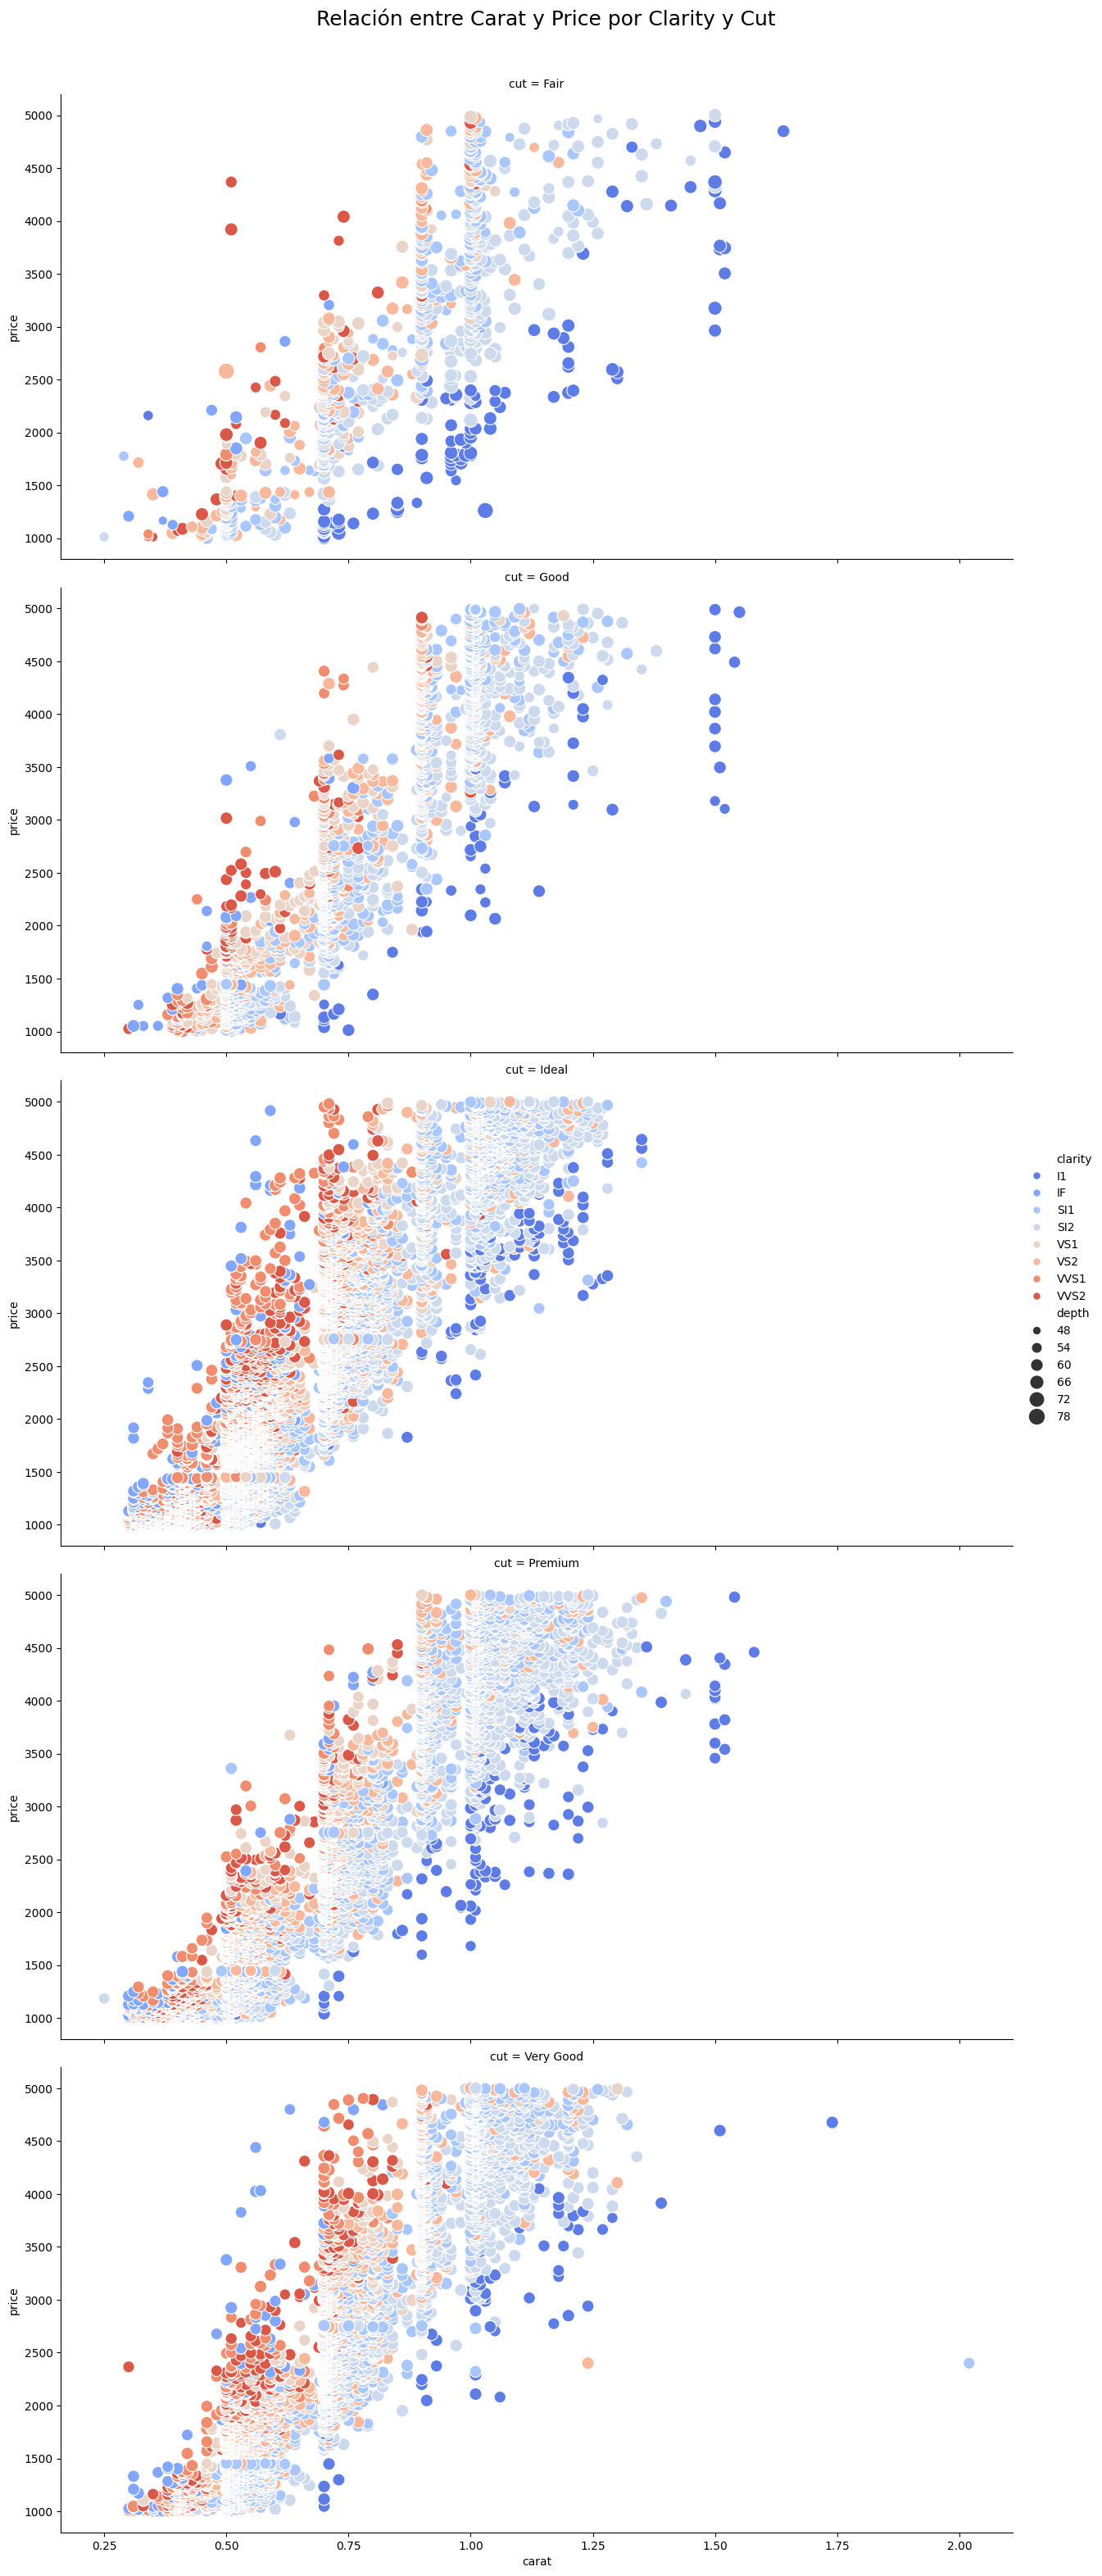

In [31]:
# Filtro: Solo seleccionamos diamantes con un precio de categoría medio para centrarnos en los que tienen un precio medio
df_filtered = df[df['price_category'] == 'medio']

# Creamos el relplot
sns.relplot(
    x='carat', y='price', 
    data=df_filtered,  
    hue='clarity', 
    col='cut', 
    size='depth', 
    sizes=(20, 200), 
    aspect=1.8, 
    height=7,
    palette='coolwarm', 
    col_wrap=1,
)

plt.subplots_adjust(top=0.95, bottom=0.1)

# Título general
plt.suptitle('Relación entre Carat y Price por Clarity y Cut', fontsize=18)

plt.show()

> **Nota sobre el Relplot: Relación entre Carat y Price por Clarity y Cut para los Diamantes de Precio Medio**
> 
> El gráfico de dispersión (`relplot`) nos permite visualizar cómo se distribuyen los diamantes en función de dos características numéricas clave: **carat** (peso del diamante) y **price** (precio). En este caso, hemos centrado el análisis en los diamantes de **precio medio** para explorar cómo sus características influencian su valor. A continuación, te explico cómo se organiza y se personaliza el gráfico:
> 
> 1. **Eje X (Carat)**: En el eje horizontal, se representa el peso de los diamantes (en quilates). Este es uno de los factores principales que determinan el precio de un diamante, ya que los diamantes más grandes suelen ser más caros.
> 
> 2. **Eje Y (Price)**: En el eje vertical, se muestra el precio de los diamantes. Aunque los diamantes más grandes generalmente tienen un precio más alto, otros factores como la claridad, el corte y la profundidad también pueden influir en su precio.
> 
> ### ¿Qué muestra cada configuración?
> 
> - **`hue='clarity'`**: Esta configuración agrega una dimensión categórica al gráfico, diferenciando los puntos por la **claridad** del diamante. Los puntos se colorean según esta variable, lo que permite ver cómo la claridad afecta a la relación entre el peso y el precio de los diamantes de precio medio.
> 
> - **`col='cut'`**: Los puntos se agrupan por **corte**. Se crean subgráficos para cada tipo de corte, lo que permite observar si la relación entre carat y price varía en función del tipo de corte.
> 
> - **`size='depth'`**: Ajusta el **tamaño de los puntos** según el valor de la variable **depth** (profundidad del diamante). Los diamantes con mayor profundidad se muestran con puntos más grandes, lo que permite ver cómo la profundidad influye en la relación entre el peso y el precio.
> 
> - **`sizes=(20, 200)`**: Define el rango de tamaños para los puntos, haciendo que los diamantes con mayor profundidad se representen con puntos proporcionalmente más grandes.
> 
> ### Personalización del gráfico
> 
> - **Tamaño del gráfico**: El gráfico tiene un tamaño de 10x7 pulgadas, lo que asegura que los detalles sean visibles y que los puntos no se superpongan, facilitando la interpretación.
> 
> - **Paleta de colores personalizada ('coolwarm')**: Se eligió una paleta de colores para representar los diferentes niveles de **clarity**, lo que mejora la claridad visual y facilita la interpretación de los distintos tipos de claridad.
> 
> Este gráfico es útil para entender cómo se distribuyen los diamantes de precio medio según su peso y precio, y cómo las características como la claridad, el corte y la profundidad afectan la visualización de los mismos. Al observar el gráfico, podemos ver fácilmente cómo los diamantes se agrupan según estas características y cómo influyen en el precio final de los diamantes de precio medio.

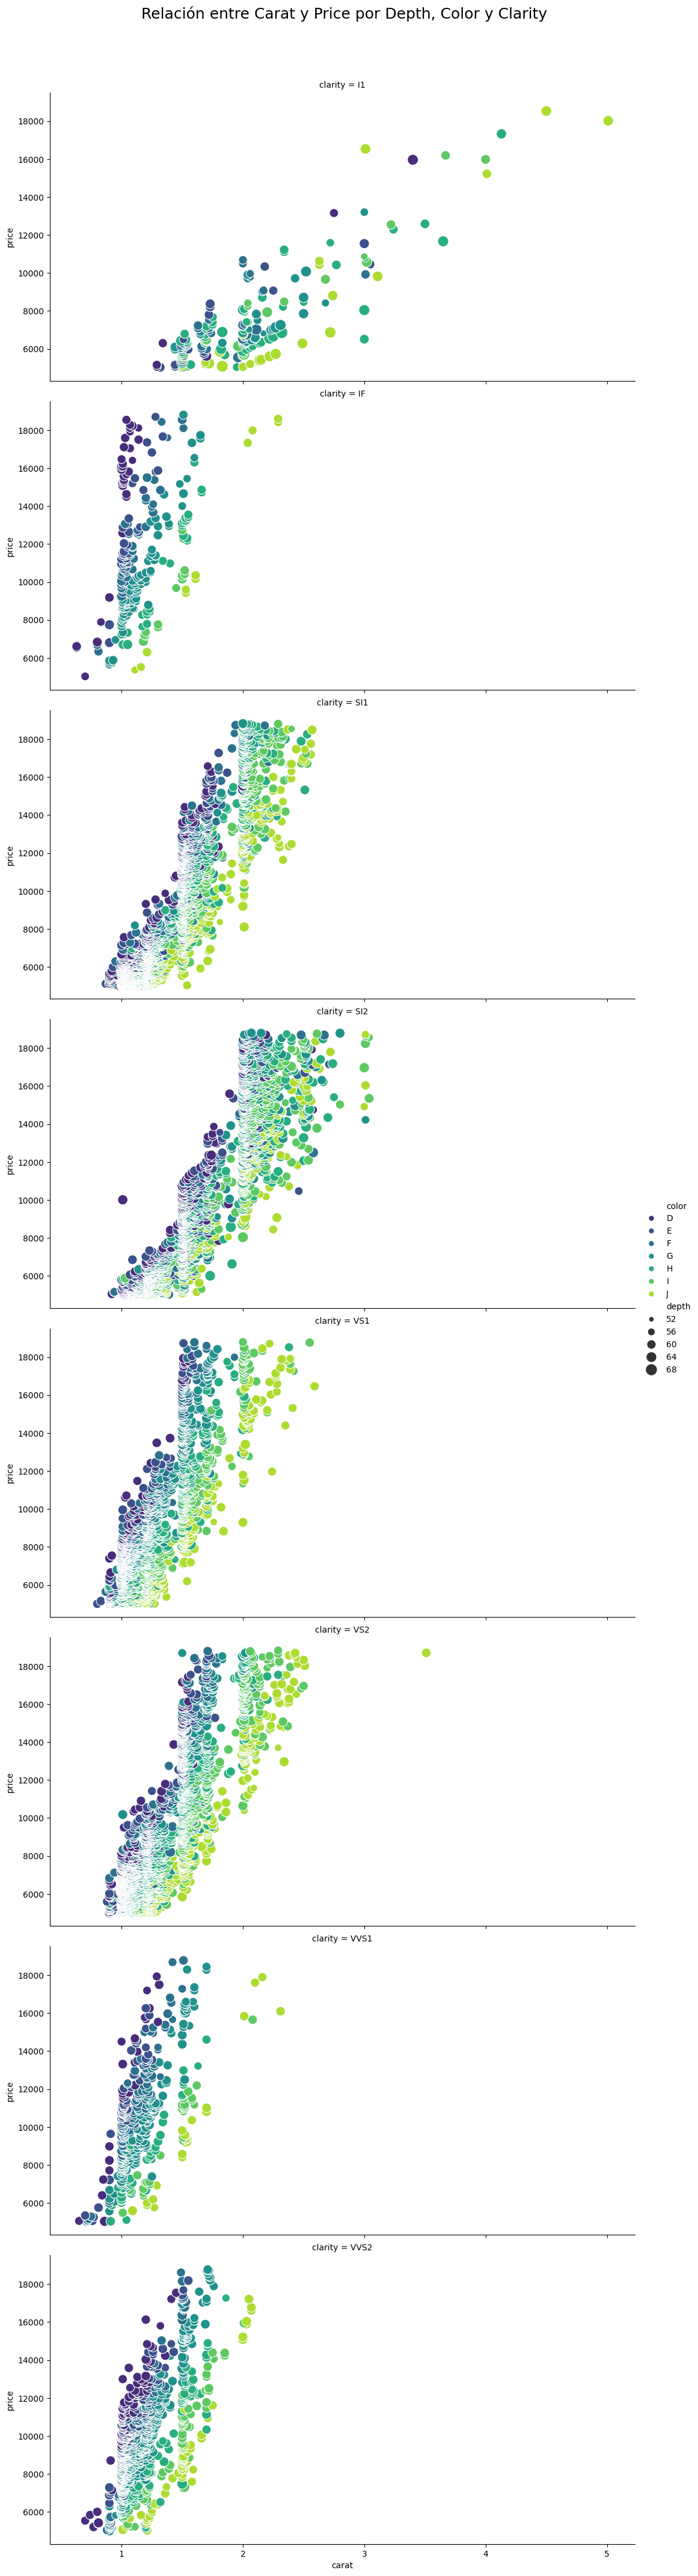

In [32]:
# Filtro: Solo seleccionamos diamantes con un precio de categoría caro para centrarnos en los más caros
df_filtered = df[df['price_category'] == 'caro']

# Crear el relplot
sns.relplot(
    x='carat', y='price',  # Ejes X e Y: Carat vs Price
    data=df_filtered,  # Usamos el DataFrame filtrado
    hue='color',  # Diferenciamos por el color del diamante
    col='clarity',  # Creamos subgráficos por la claridad
    size='depth',  # El tamaño de los puntos está basado en la profundidad
    sizes=(20, 200),  # Rango de tamaños
    aspect=1.8,  # Ajustamos la relación de aspecto para más espacio horizontal
    height=6,  # Tamaño de los subgráficos
    palette='viridis',  # Paleta de colores
    col_wrap=1,  # Mostrar los gráficos en dos columnas por fila
)

plt.subplots_adjust(top=0.95, bottom=0.1)

# Título general
plt.suptitle('Relación entre Carat y Price por Depth, Color y Clarity', fontsize=18)

# Mostrar el gráfico
plt.show()

> **Nota sobre el Relplot: Relación entre Carat y Price por Depth, Color y Clarity para los Diamantes Más Caros**
> 
> El gráfico de dispersión (`relplot`) nos permite visualizar cómo se distribuyen los diamantes en función de dos características numéricas clave: **carat** (peso del diamante) y **price** (precio). En este caso, hemos centrado el análisis en los diamantes de **precio alto** para explorar cómo sus características influencian su valor. A continuación, te explico cómo se organiza y se personaliza el gráfico:
> 
> 1. **Eje X (Carat)**: En el eje horizontal, se representa el peso de los diamantes (en quilates). Este es uno de los factores principales que determinan el precio de un diamante, ya que los diamantes más grandes suelen ser más caros.
> 
> 2. **Eje Y (Price)**: En el eje vertical, se muestra el precio de los diamantes. Aunque los diamantes más grandes generalmente tienen un precio más alto, otros factores como la claridad, el corte y la profundidad también pueden influir en su precio.
> 
> ### ¿Qué muestra cada configuración?
> 
> - **`hue='color'`**: Esta configuración agrega una dimensión categórica al gráfico, diferenciando los puntos por el **color** del diamante. Los puntos se colorean según esta variable, lo que permite ver cómo el color influye en la relación entre el peso y el precio de los diamantes caros.
> 
> - **`col='clarity'`**: Los puntos se agrupan por **claridad**. Se crean subgráficos para cada nivel de claridad, lo que permite observar si la relación entre carat y price varía en función de la claridad.
> 
> - **`size='depth'`**: Ajusta el **tamaño de los puntos** según el valor de la variable **depth** (profundidad del diamante). Los diamantes con mayor profundidad se muestran con puntos más grandes, lo que permite ver cómo la profundidad influye en la relación entre el peso y el precio.
> 
> - **`sizes=(20, 200)`**: Define el rango de tamaños para los puntos, haciendo que los diamantes con mayor profundidad se representen con puntos proporcionalmente más grandes.
> 
> ### Personalización del gráfico
> 
> - **Tamaño del gráfico**: El gráfico tiene un tamaño de 10x6 pulgadas, lo que asegura que los detalles sean visibles y que los puntos no se superpongan, facilitando la interpretación.
> 
> - **Paleta de colores personalizada ('viridis')**: Se eligió una paleta de colores para representar los diferentes niveles de **color**, lo que mejora la claridad visual y facilita la interpretación de los distintos colores de los diamantes.
> 
> Este gráfico es útil para entender cómo se distribuyen los diamantes caros según su peso y precio, y cómo las características como el color, la claridad y la profundidad afectan la visualización de los mismos. Al observar el gráfico, podemos ver fácilmente cómo los diamantes se agrupan según estas características y cómo influyen en el precio final de los diamantes de precio alto.